# Spreading Factor Assignment Strategy for Coverage and Capacity Flexible trade-off (new simulations and 3D plots)

### Authors : Luiz (UFJF), Álvaro (UFJF), Jessika (UFRN), Vicente Sousa (UFRN)

**Targets:**
- HOWTO material to download, configure and compile the code;
- HOWTO material to create, run and plot simulations results (including Python scripts);
- Preliminaly analyses of simulation results.


# Simulation Campaings (creation, run and plot)

Our processes to create, run and plot a simulation campaign are completely based on **yaml** files. In these files, a set of parameters is definied as well as the target parameter to a **parametric evaluation**. Such parametric evaluation allows for the analyses of the LoRaWAN metrics in function of the defined range of the target parameter.

The **yaml** file will be used by to Python functions: the **loraScript.py**, which generates all auxiliary files to run simulations; and **plotScript.py**, which plots the simulation results.

Herein, we provide three campaigns we used to perform the proof-of-concept simulations of our ADR proposal. The **(target parameter** defines the x-axis of the generated plots. Simulation campaigns are:

- **ADR_campaign1**
  - **nDevices** campaign with the following parameters:
    - nDevices (target parameter): 1000, 2000, 3000, 4000, 5000, 6000;
    - radius: 3000
   
  - **radius** campaign with the following parameters:
    - radius (target parameter): 2000, 3000, 4000, 6000, 8000, 10000;
    - nDevices: 3000 


- **ADR_campaign2**
  - **nDevices** campaign with the following parameters:
    - nDevices (target parameter): 1000, 2000, 3000, 4000, 5000, 6000;
    - radius: 6000
   
  - **radius** campaign with the following parameters:
    - radius (target parameter): 2000, 3000, 4000, 6000, 8000, 10000;
    - nDevices: 6000 


- **ADR_campaign3**
  - **nDevices** campaign with the following parameters:
    - nDevices (target parameter): 1000, 2000, 3000, 4000, 5000, 6000;
    - radius: 10000
   
  - **radius** campaign with the following parameters:
    - radius (target parameter): 2000, 3000, 4000, 6000, 8000, 10000;
    - nDevices: 1000 


**Attention**: maybe you need to specify the **ns3_path** (with our complete path) to run simulation in our local machine.


Considering the algorithms, we define the following sequence:
  - (I) Fixed at the lowest SF
  - (II)  Fixed  at  the  highest  SF
  - (III)  Equally  divided
  - (IV) Arbitrarily divided - Capacity enhancement (a= {0.6,0.2,0.05,0.05,0.05,0.05})
  - (V) Arbitrarily divided - Coverage enhancement (a={0.05,0.05,0.05,0.05,0.2,0.6})
  - (VI) Sensitivity based
  - (VII) Sensitivity based arbitrarily divided - Capacity enhancement (a= {0.6,0.2,0.05,0.05,0.05,0.05})
  - (VIII) Sensitivity based arbitrarily divided - Coverage enhancement (a={0.05,0.05,0.05,0.05,0.2,0.6})
  - (IX) Random assignment
  - (X) Wiht reallocation (to further investigations)

### Campaign Criation

To configure the simulation campaign and create **ADR_campaign....yaml** file, run the following codes. We set a number of 10 simulation runs (configurable) to get statiscal confidence of performance metrics. 

We create three **ADR_campaign....yaml** files for each campaign, one for running scripts on our remote simulation cluster (**ADR_campaign1_cluster.yaml**), other for running simulation on local machine (**ADR_campaign1_local.yaml**)  and another for plotting results on local machine (**ADR_campaign1_plot.yaml**). This is necessary because different directories.



**Files for Campaign 1:** Radius = 3000 with variation of nDevices, and nDevices = 3000 with variation of Radius

Filenames:  

- ADR_campaign1_cluster.yaml
- ADR_campaign1_local.yaml
- ADR_campaign1_plot.yaml


In [ ]:
%%file ADR_campaign1_cluster.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN1
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/vadsjunior/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

In [78]:
%%file ADR_campaign1_local.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN1
    # Set location of simulation: local or cluster
    simLocation: local
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator (no relative path)
    ns3_path: /home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Overwriting ADR_campaign1_local.yaml


In [22]:
%%file ADR_campaign1_plot.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN1
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 8
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Overwriting ADR_campaign1_plot.yaml


**Files for Campaign 2:** Radius = 6000 with variation of nDevices, and nDevices = 6000 with variation of Radius
Filenames:  

- ADR_campaign2_cluster.yaml
- ADR_campaign2_local.yaml
- ADR_campaign2_plot.yaml


In [ ]:
%%file ADR_campaign2_cluster.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN2
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 6000
        - 1000
        - 2000 
        - 3000
        - 4000
        - 5000
    # The radius of the area to simulate
    radius: 
        - 6000
        - 2000
        - 3000
        - 4000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/vadsjunior/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

In [79]:
%%file ADR_campaign2_local.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN2
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 6000
        - 1000
        - 2000 
        - 3000
        - 4000
        - 5000
    # The radius of the area to simulate
    radius: 
        - 6000
        - 2000
        - 3000
        - 4000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator (no relative path)
    ns3_path: /home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Overwriting ADR_campaign2_local.yaml


In [80]:
%%file ADR_campaign2_plot.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN2
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 6000
        - 1000
        - 2000 
        - 3000
        - 4000
        - 5000
    # The radius of the area to simulate
    radius: 
        - 6000
        - 2000
        - 3000
        - 4000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 8
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Writing ADR_campaign2_plot.yaml


**Files for Campaign 3:** Radius = 10000 with variation of nDevices, and nDevices = 1000 with variation of Radius

Filenames:  

- ADR_campaign3_cluster.yaml
- ADR_campaign3_local.yaml
- ADR_campaign3_plot.yaml


In [ ]:
%%file ADR_campaign3_cluster.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN3
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 1000
        - 2000 
        - 3000
        - 4000
        - 5000
        - 6000
    # The radius of the area to simulate
    radius: 
        - 10000
        - 2000
        - 3000
        - 4000
        - 6000
        - 8000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/vadsjunior/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

In [81]:
%%file ADR_campaign3_local.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN3
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 1000
        - 2000 
        - 3000
        - 4000
        - 5000
        - 6000
    # The radius of the area to simulate
    radius: 
        - 10000
        - 2000
        - 3000
        - 4000
        - 6000
        - 8000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Overwriting ADR_campaign3_local.yaml


In [82]:
%%file ADR_campaign3_plot.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN3
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 1000
        - 2000 
        - 3000
        - 4000
        - 5000
        - 6000
    # The radius of the area to simulate
    radius: 
        - 10000
        - 2000
        - 3000
        - 4000
        - 6000
        - 8000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 8
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator (no relative path)
    ns3_path: /home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Overwriting ADR_campaign3_plot.yaml


A seguinte função em python foi criada para, de posse do arquivo **yaml**, criar um arquivo **.sh** para rodar a campanha de simulação.  Ao executar esse código no Jupyter Notebook (Shift+Enter), o arquivo **loraScript.py** é gerado.

In [83]:
%%file loraScript.py
from collections import defaultdict
import os
import math
import random
import re
import subprocess
import sys
import argparse
from glob import glob
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle
# To install YAML: sudo apt-get install python3-yaml
import yaml

class Simulation:
    def __init__(self, configurations_file):
        #self.email_to = 'sicrano@gmail.com'            
        with open(configurations_file, 'r') as f:
            self.doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
        self.campaign_name = os.path.splitext(configurations_file)[0]
        
        # Read commom parameters
        self.campaignX = self.doc['scenario']['campaignX']
        self.campaignLines = self.doc['scenario']['campaignLines'][0]
        self.simLocation = str(doc['scenario']['simLocation'])
        self.simulationTime = self.doc['scenario']['simulationTime']
        self.nDevices = self.doc['scenario']['nDevices'][0]
        self.radius = self.doc['scenario']['radius'][0]
        self.appPeriodSeconds = self.doc['scenario']['appPeriodSeconds']
        self.bPrint = (self.doc['scenario']['bPrint'])
        self.fixedSeed = (self.doc['scenario']['fixedSeed'])
        self.algoritmo = self.doc['scenario']['algoritmo'][0]
        self.ns3_path = str(self.doc['scenario']['ns3_path'])
        #self.ns3_path = os.getcwd() + '/' + self.ns3_path
        self.ns3_path = self.ns3_path
        self.ns3_script = str(self.doc['scenario']['ns3_script'])
        self.nJobs = int(self.doc['scenario']['jobs'])
        self.targetRealocation  = (self.doc['scenario']['targetRealocation'])[0]
        self.filename = str(self.doc['scenario']['filename'])
        self.configurations_file = configurations_file
       
    def runCampaign(self,curCampaign):
        # Configure simulation file in accordance with campaign parameter
        sh_name = self.campaign_name + '_' + curCampaign
        print(curCampaign+" campaign written in file: " 'run_%s.sh' % sh_name)
        with open('run_%s.sh' % sh_name, 'w') as f:                    
            
            f.write('#!/bin/bash\n')
            if simLocation == 'cluster':
                f.write('#SBATCH --time=10-00:00          #Tempo máximo do job no formato DIAS-HORAS:MINUTOS\n')
                f.write('module load compilers/gnu/7.3\n')
                f.write('module load softwares/python/3.6-anaconda-5.0.1\n')
            
            outputDir = self.ns3_path+'/results_'+ self.filename + '_' + curCampaign
            f.write('rm -rf '+outputDir+' 2>/dev/null\n')
            f.write('mkdir -p '+outputDir+'\n')
            f.write('cp -f run_'+sh_name+'.sh'+' '+outputDir+'\n')
            f.write('cp -f '+self.configurations_file+ ' ' +outputDir+'\n')
            f.write("cd '"+self.ns3_path+"'"+"\n")
            ic = 1;
            for iJob in range(0, self.nJobs):
                jobRunSeed = random.randint(1, 23*10**14)
                for curLine in self.doc['scenario'][self.campaignLines]:
                    for varParam in self.doc['scenario'][curCampaign]:
                        command = (
                        'NS_GLOBAL_VALUE="RngRun='+str(jobRunSeed)+ '" ' +
                        "./waf --run '"+self.ns3_script+
                        " --radius="+self.radius+
                        " --nDevices="+self.nDevices+
                        " --simulationTime="+self.simulationTime+
                        " --appPeriodSeconds="+self.appPeriodSeconds+
                        " --print="+self.bPrint+
                        " --fixedSeed="+str(self.fixedSeed)+
                        " --targetRealocation="+self.targetRealocation+
                        " --algoritmo="+self.algoritmo+
                        " --filename="+ self.filename +
                        " --outputDir='"+outputDir+"'"
                        " --"+self.campaignLines+"="+curLine+
                        " --"+curCampaign+"="+varParam+
                        "'"
                        )
                        if ((ic % 7) == 0):
                            f.write(command+' & wait\n')
                        else:
                            f.write(command+' &\n')
                        ic = ic + 1;    
                
        
                      
parser = argparse.ArgumentParser()
parser.add_argument("-f", "--file", type=str, help='Configuration File')
args = parser.parse_args()

configurations_file = args.file; 
with open(configurations_file, 'r') as f:
    doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
    campaign_name = os.path.splitext(configurations_file)[0]

print('Simulação escolhida: ')
campaign = doc['scenario']['campaignX']
print(campaign)

simLocation = str(doc['scenario']['simLocation'])
if simLocation == 'cluster':
    with open('run_NPAD_%s.sh' % campaign_name, 'w') as fnpad:
        fnpad.write('#!/bin/bash\n')
        #fnpad.write('#SBATCH --time=10-00:00          #Tempo máximo do job no formato DIAS-HORAS:MINUTOS\n')
        
simu = Simulation(configurations_file)



for simC in campaign:
    if str(simC) == 'nDevices' or str(simC) == 'radius' or str(simC) == 'targetRealocation':
        simu.runCampaign(simC);
        if simLocation == 'cluster':
            with open('run_NPAD_%s.sh' % campaign_name, 'a') as fnpad:
                sh_name = campaign_name + '_' + simC
                fileName = ('run_%s.sh' % sh_name);
                fnpad.write('sbatch '+fileName+'\n')

    else:
        print('Invalid simulation campaign: verify the campaign parameter!')

Overwriting loraScript.py


O Script **loraScript.py** recebe um arquivo **yaml** com parâmetro de entrada e gera os segugintes arquivos:

- **run_campanha_local_nDevices.sh**: com as chamadas para as simulações variando o número de dispositivos;
- **run_campanha_local_radius.sh**: com as chamadas para as simulações variando o raio.

Esses dois arquivos **.sh** devem ser chamados em um terminal, chamando as simulações especificas de cada caso.

Abaixo, o script **loraScript.py** é chamado para a **campanha_1.yaml** criada anteriormente.


In [ ]:
%run loraScript -f "ADR_campaign1_cluster.yaml"

Foram criados três arquivos:

  - **run_ADR_campaign1_cluster_radius.sh:** chamadas das simulação da parte 1 da campanha 1;
  - **run_ADR_campaign1_cluster_nDevices.sh:** chamadas das simulação da parte 2 da campanha 1;
  - **run_NPAD_ADR_campaign1_cluster.sh:** comando para ser chamado no cluster com objetivo de escalonar as simulações definidas em  **run_ADR_campaign1_cluster_radius.sh:** e **run_ADR_campaign1_cluster_nDevices.sh:**.


Para rodar o código em um terminal, digite:

```python
python3 loraScript.py -f 'ADR_campaign1_cluster.yaml'
```

Para rodar o script para campanhas no computador local, digite:

In [84]:
%run loraScript -f "ADR_campaign1_local.yaml"

Simulação escolhida: 
['radius', 'nDevices']
radius campaign written in file: run_ADR_campaign1_local_radius.sh
nDevices campaign written in file: run_ADR_campaign1_local_nDevices.sh


Foram criados três arquivos:

  - **run_ADR_campaign1_local_radius.sh:** chamadas das simulação da parte 1 da campanha 1;
  - **run_ADR_campaign1_local_nDevices.sh:** chamadas das simulação da parte 2 da campanha 1;

**Os arquivos devem ser chamados diretamente para rodarem as simulações.**


In [ ]:
%run loraScript -f "ADR_campaign2_cluster.yaml"


In [85]:
%run loraScript -f "ADR_campaign2_local.yaml"

Simulação escolhida: 
['radius', 'nDevices']
radius campaign written in file: run_ADR_campaign2_local_radius.sh
nDevices campaign written in file: run_ADR_campaign2_local_nDevices.sh


In [ ]:
%run loraScript -f "ADR_campaign3_cluster.yaml"


In [86]:
%run loraScript -f "ADR_campaign3_local.yaml"

Simulação escolhida: 
['radius', 'nDevices']
radius campaign written in file: run_ADR_campaign3_local_radius.sh
nDevices campaign written in file: run_ADR_campaign3_local_nDevices.sh


O código a seguir executa os arquivos **.sh** diretamente deste Jupyter Notebook (simulação local).

In [ ]:
!chmod +x ./run_ADR_campaign1_local_radius.sh
!./run_ADR_campaign1_local_radius.sh


!chmod +x ./run_ADR_campaign1_local_nDevices.sh
!./run_ADR_campaign1_local_nDevices.sh

Waf: Entering directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Waf: Entering directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Waf: Entering directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Waf: Entering directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Waf: Entering directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Waf: Entering directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Waf: Entering directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Waf: Leaving directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Build commands will be stored in build/compile_commands.json
'build' finished successfully (11.953s)
Waf: Leaving directory `/home/gppcom/2020_1/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29/build'
Build commands will be stored in build/compile_commands

In [ ]:
!chmod +x ./run_ADR_campaign2_local_radius.sh
!./run_ADR_campaign2_local_radius.sh


!chmod +x ./run_ADR_campaign2_local_nDevices.sh
!./run_ADR_campaign2_local_nDevices.sh

In [ ]:
!chmod +x ./run_ADR_campaign3_local_radius.sh
!./run_ADR_campaign3_local_radius.sh


!chmod +x ./run_ADR_campaign3_local_nDevices.sh
!./run_ADR_campaign3_local_nDevices.sh

Os arquivos **.sh** acima chamam as simulações uma a uma, guardando o resultados no seguintes arquivos e pastas:


- **results_CampaignLoraWAN1_nDevices:** parte 1 da campanha 1;
- **results_CampaignLoraWAN1_radius:** parte 1 da campanha 1;
- **results_CampaignLoraWAN2_nDevices:** parte 1 da campanha 2;
- **results_CampaignLoraWAN2_radius:** parte 2 da campanha 2;
- **results_CampaignLoraWAN3_nDevices:** parte 1 da campanha 3;
- **results_CampaignLoraWAN3_radius:** parte 2 da campanha 3;
  

# Plotar gráficos 

Para plotar gráficos, chamaremos o mesmo arquivo **yaml** que foi usado para criar as campanhas de simulação. Um novo script chamado **plotScript.py** foi construído para esse fim. Ao executar esse código no Jupyter Notebook (Shift+Enter), o arquivo **plotScript.py** é gerado.

In [44]:
%%file plotScript.py
# Legend
#   RunSeed: 0
#   Seed: 1
#   Algoritmo: 2
#   Radius: 3
#   nDevices: 4
#   appPeriodSeconds:5
#   simulationTime:6
#   PHYTotal: 7
#   PHYSuccessful:8 
#   PHYInterfered: 9
#   PHYNoMoreReceivers: 10
#   PHYUnderSensitivity: 11
#   PHYLostBecauseTX: 12
#   SimulationDuration: 13

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle
import scipy.stats as st
import os
import argparse
import yaml
import matplotlib
from random import randint   
import itertools      

class openSimulation:
    def __init__(self, configurations_file):
        self.email_to = 'fulano@gmail.com'            
        with open(configurations_file, 'r') as f:
            self.doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
        self.campaign_name = os.path.splitext(configurations_file)[0]
        
        # Read commom parameters
        self.showPlot = True;
        self.plotCI = True;                
        self.campaignX = self.doc['scenario']['campaignX']
        self.campaignLines = self.doc['scenario']['campaignLines'][0]
        self.simLocation = str(doc['scenario']['simLocation'])
        self.simulationTime = self.doc['scenario']['simulationTime']
        self.nDevices = self.doc['scenario']['nDevices']
        self.nDevices = list(map(float,self.nDevices))
        self.radius = self.doc['scenario']['radius']
        self.radius = list(map(float,self.radius))
        self.appPeriodSeconds = self.doc['scenario']['appPeriodSeconds']
        self.bPrint = (self.doc['scenario']['bPrint'])
        self.fixedSeed = (self.doc['scenario']['fixedSeed'])
        self.Algoritmo = self.doc['scenario']['algoritmo']
        self.ns3_path = str(self.doc['scenario']['ns3_path'])
        self.ns3_path = os.getcwd() + '/' + self.ns3_path
        self.ns3_script = str(self.doc['scenario']['ns3_script'])
        self.nJobs = int(self.doc['scenario']['jobs'])
        if self.nJobs == 1: # disable the confidence interval
            self.plotCI = False;
        self.filename = str(self.doc['scenario']['filename'])
        self.targetRealocation  = self.doc['scenario']['targetRealocation']
        
    def doLabelalgoritmo(self, algID):
        # Define labels for plots legends
        if algID == '1':
            return "SF7 (I)"
        elif algID == '2':
            return "Equal Split (II)"
        elif algID == '3':
            return "Unequal Split (III)"
        elif algID == '4':
            return "Product-based (IV)"
        elif algID == '5':
            return "Proposed ADR (V)"
        elif algID == '6':
            return "Random ADR (VI)"
        elif algID == '7':
            return "ADR Realocation (VII)"
        elif algID == '8':
            return "SF 12 (VIII)"
            
    def doLabeltargetRealocation(self, realocRate):
        # Define labels for plots legends
        return "Real. = "+realocRate+" %"
        
    def plotCampaign(self,curCampaign, metric):
        # some general configurations
        #outputDir = self.ns3_path+'/results_'+self.simLocation + '_' + curCampaign
        outputDir = self.ns3_path+'/results_'+self.filename+'_' + curCampaign
        chFile = outputDir+ "/" + self.filename + '.txt'        
        print(chFile)
        simTime = np.loadtxt(chFile, skiprows=1, usecols=(6, ), delimiter=',', unpack=False)                
        resalgoritmo = np.loadtxt(chFile, skiprows=1, usecols=(2, ), delimiter=',', unpack=False)
        restargetRealocation = np.loadtxt(chFile, skiprows=1, usecols=(14, ), delimiter=',', unpack=False)
        resradius = np.loadtxt(chFile, skiprows=1, usecols=(3, ), delimiter=',', unpack=False)
        resnDevices = np.loadtxt(chFile, skiprows=1, usecols=(4, ), delimiter=',', unpack=False)
        ressimDur = np.loadtxt(chFile, skiprows=1, usecols=(13, ), delimiter=',', unpack=False)
        resphyTotal = np.loadtxt(chFile, skiprows=1, usecols=(7, ), delimiter=',', unpack=False)
        resphySucc = np.loadtxt(chFile, skiprows=1, usecols=(8, ), delimiter=',', unpack=False)
        markers_on_all = cycle(list(itertools.product([0], [1,2,3,4,5])))
        markersA = cycle(('o', 'v', 'D', '>', 'h', '^', '*', '>', 's', 'H', 'D', 'd'))
        colors = cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))                    
        plt.figure()     
        #for iAlg in self.algoritmo:
        for curLine in self.doc['scenario'][self.campaignLines]: 
            m_plr, m_plrCI, m_tput, m_tputCI, m_pkt, m_pktCI = [], [], [], [], [], []
            color=next(colors)
            marker=next(markersA)
            markers_on=next(markers_on_all)
            #label = self.doLabel(iAlg)            
            label = eval('self.doLabel'+self.campaignLines+'(str(curLine))')
            # Current values of line metrics'
            curMetricLine = eval('res'+self.campaignLines)
            resxData = eval('sorted(self.'+curCampaign+',key=int)')             
            
            for varParam in sorted(self.doc['scenario'][curCampaign],key=int):                
                
                # Current values of y-axis metrics
                curMetricAxis = eval('res'+curCampaign)
                resalgIndexs = (curMetricLine == int(curLine)) & (curMetricAxis == int(varParam))                
                                
                if str(curCampaign) == 'radius':
                    #resalgIndexs = (resalg == int(iAlg)) & (resradius == int(varParam))
                    chtitle = 'Configuração ('+ self.doc['scenario']['nDevices'][0] +' dispositivos)'
                    xlabel='Distância [m]'
                    #resxData = sorted(self.radius,key=int) 
                    # label = self.doLabel(iAlg)
                elif str(curCampaign) == 'nDevices':
                #    resalgIndexs = (resalg == int(iAlg)) & (resnDevices == int(varParam))                    
                    xlabel='Quantidade de Dispositivos'
                    chtitle = 'Configuração (raio = '+ self.doc['scenario']['radius'][0] +' m)'
                #    resxData = sorted(self.nDevices,key=int)
                #    label = self.doLabel(iAlg)
                elif str(curCampaign) == 'targetRealocation':
                #    resalgIndexs = (resalg == int(iAlg)) & (restargetRealocation == int(varParam))                    
                    xlabel='Taxa de realocação [%]'
                    chtitle = 'Configuração ('+ self.doc['scenario']['nDevices'][0] +' dispositivos, raio = '+ self.doc['scenario']['radius'][0]+')'
                #    resxData = self.targetRealocation
                                        
                # Plr Evaluation
                if metric=='PLR':                
                    # Calculate PLR line
                    plr = 100*( resphyTotal[resalgIndexs]-resphySucc[resalgIndexs] ) / resphyTotal[resalgIndexs]
                    m_plr = np.append(m_plr, np.mean(plr))
                    # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                    l, h = st.t.interval(0.95, len(plr)-1, loc=np.mean(plr), scale=st.sem(plr))
                    #l,h = st.norm.interval(0.95, loc=np.mean(plr), scale=st.sem(plr))                                                            
                    m_plrCI = np.append(m_plrCI, h)
                elif metric=='Tput':
                    # TODO
                    # Calculate PLR line
                    tput = 23*( resphySucc[resalgIndexs] ) / float(self.simulationTime)
                    m_tput = np.append(m_tput, np.mean(tput))
                    # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                    l, h = st.t.interval(0.95, len(tput)-1, loc=np.mean(tput), scale=st.sem(tput))
                    #l,h = st.norm.interval(0.95, loc=np.mean(tput), scale=st.sem(tput))                    
                    m_tputCI = np.append(m_tputCI, h)
                elif metric=='Pkt':
                    # TODO
                    # Calculate PLR line
                    pkt = 100 * ( resphySucc[resalgIndexs] ) / resphyTotal[resalgIndexs]
                    m_pkt = np.append(m_pkt, np.mean(pkt))
                    # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                    l, h = st.t.interval(0.95, len(pkt)-1, loc=np.mean(pkt), scale=st.sem(pkt))
                    #l,h = st.norm.interval(0.95, loc=np.mean(pkt), scale=st.sem(pkt))                    
                    m_pktCI = np.append(m_pktCI, h)

                
            # Plot line
            if metric=='PLR':                         
                plt.plot(resxData,m_plr, label=label, marker=marker,color=color,markevery=markers_on)   
                if bool(self.plotCI):
                    plt.errorbar(resxData,m_plr, yerr=(m_plrCI-m_plr), color=color, ls = 'none', marker=marker, lw = 2, capthick = 2,markevery=markers_on)
            elif metric=='Tput':
                # TODO
                plt.plot(resxData,m_tput, label=label, marker=marker,color=color,markevery=markers_on)    
                if bool(self.plotCI):                
                    plt.errorbar(resxData,m_tput, yerr = (m_tputCI-m_tput), marker=marker,color=color, ls = 'none', lw = 2, capthick = 2,markevery=markers_on)
            elif metric=='Pkt':
                # TODO
                plt.plot(resxData,m_pkt, label=label, marker=marker,color=color,markevery=markers_on)    
                if bool(self.plotCI):                
                    plt.errorbar(resxData,m_pkt, yerr = (m_pktCI-m_pkt), marker=marker,color=color, ls = 'none', lw = 2, capthick = 2,markevery=markers_on)
            
        # Plot figure
        params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
        plt.rcParams.update(params)        
        os.makedirs(outputDir+"/ps", exist_ok=True)
        os.makedirs(outputDir+"/png", exist_ok=True)
        
        if metric=='PLR':        
            # Show and save PLR plot
            ylabel="PLR [%]"
            if bool(self.plotCI):
                imgfilename = 'PLR_CI_'+curCampaign
            else:
                imgfilename = 'PLR_'+curCampaign
        elif metric=='Tput':
            # Show and save PLR plot
            ylabel="Tput [bps]"
            if bool(self.plotCI):
                imgfilename = 'TPUT_CI_'+curCampaign
            else:
                imgfilename = 'TPUT_'+curCampaign    
        elif metric=='Pkt':
            # Show and save PLR plot
            ylabel="Pacotes recebidos [%]"
            if bool(self.plotCI):
                imgfilename = 'PKT_CI_'+curCampaign
            else:
                imgfilename = 'PKT_'+curCampaign    

        # Plot general configuration
        plt.savefig(outputDir+"/png/"+imgfilename+".png")
        plt.savefig(outputDir+"/ps/"+imgfilename+".eps")       
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(chtitle)
        #plt.legend(loc='best', numpoints=1) 
        #plt.tight_layout()
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        plt.grid()
        if bool(self.showPlot):
            plt.show()
        else:
            plt.close()
                
                
parser = argparse.ArgumentParser()
parser.add_argument("-f", "--file", type=str, help='Configuration File')
args = parser.parse_args()

configurations_file = args.file; 
with open(configurations_file, 'r') as f:
    doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
    campaign_name = os.path.splitext(configurations_file)[0]

# print(doc)
print('Simulação escolhida: ')
campaign = doc['scenario']['campaignX']
print(campaign)
                 
simu = openSimulation(configurations_file)
for iMet in ['PLR', 'Tput', 'Pkt']:
    for simC in campaign:
        if str(simC) == 'nDevices' or str(simC) == 'radius' or str(simC) == 'targetRealocation':
            simu.plotCampaign(simC,iMet);
        else:
            print('Invalid simulation campaign: verify the campaign parameter!')

Overwriting plotScript.py


Abaixo, o script **plotScript.py** é chamado para a **campanha_1.yaml** criada e simulada anteriormente. 

In [45]:
%run plotScript -f "ADR_campaign1.yaml"

FileNotFoundError: [Errno 2] No such file or directory: 'ADR_campaign1.yaml'

In [48]:
%run plotScript -f "ADR_campaign1_local.yaml"

Simulação escolhida: 
['radius', 'nDevices']
/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN1_radius/CampaignLoraWAN1.txt


FileNotFoundError: [Errno 2] No such file or directory: '/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN1_radius/CampaignLoraWAN1.txt'

In [ ]:
%run plotScript -f "ADR_campaign2_local.yaml"

Simulação escolhida: 
['radius', 'nDevices']
/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN1_radius/CampaignLoraWAN1.txt


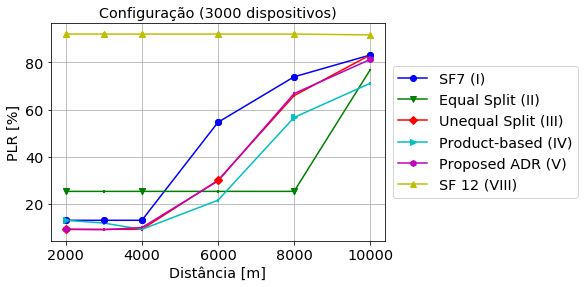

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN1_nDevices/CampaignLoraWAN1.txt


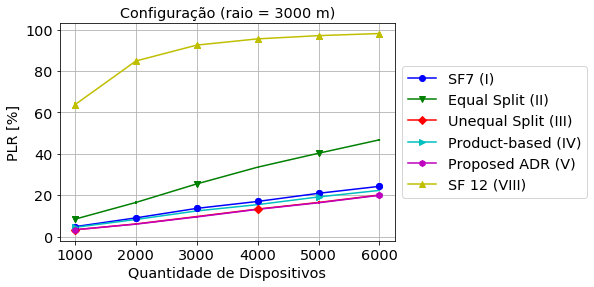

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN1_radius/CampaignLoraWAN1.txt


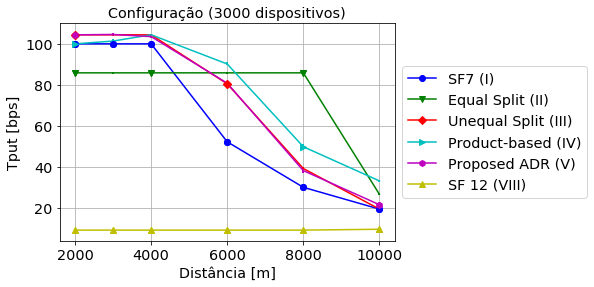

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN1_nDevices/CampaignLoraWAN1.txt


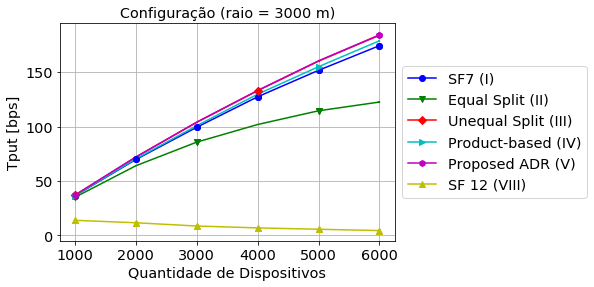

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN1_radius/CampaignLoraWAN1.txt


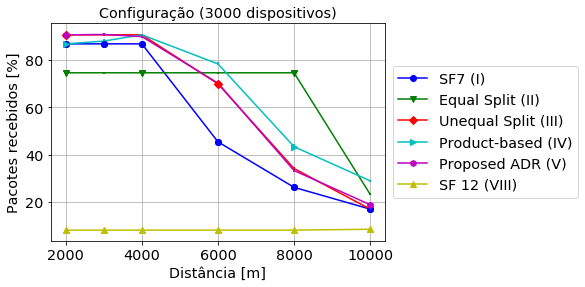

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN1_nDevices/CampaignLoraWAN1.txt


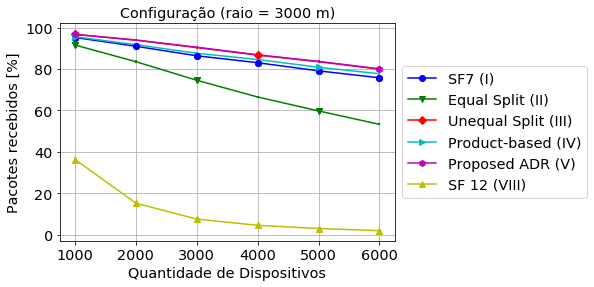

In [15]:
%run plotScript -f "ADR_campaign3_local.yaml"

É possível abservar que o intervalo de confiana já é bem pequeno para 20 jobs.

Simulação escolhida: 
['radius', 'nDevices']
/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN2_radius/CampaignLoraWAN2.txt


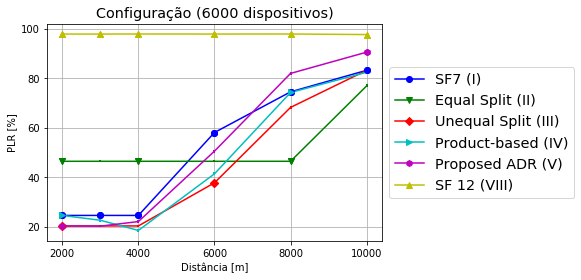

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN2_nDevices/CampaignLoraWAN2.txt


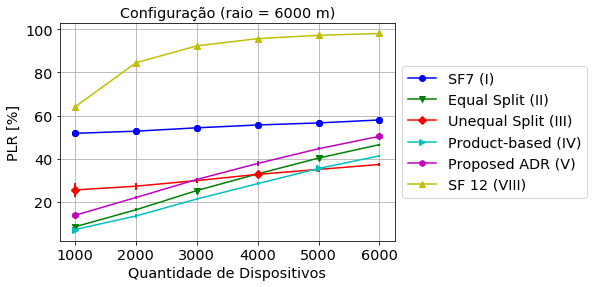

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN2_radius/CampaignLoraWAN2.txt


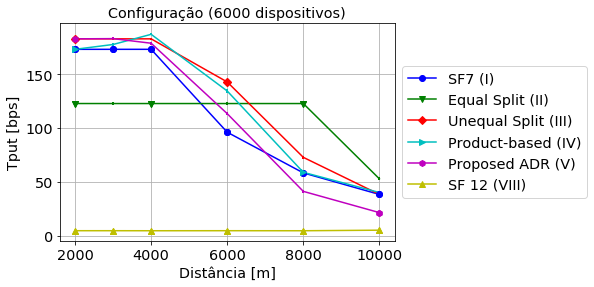

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN2_nDevices/CampaignLoraWAN2.txt


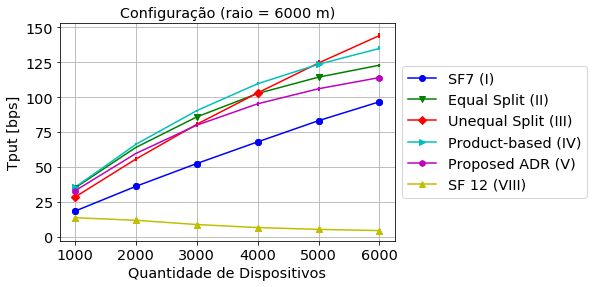

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN2_radius/CampaignLoraWAN2.txt


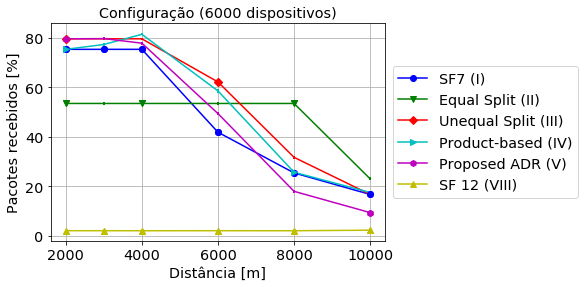

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN2_nDevices/CampaignLoraWAN2.txt


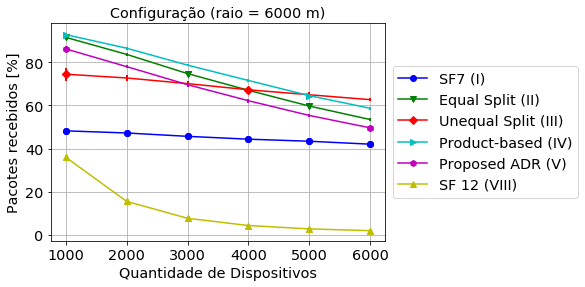

In [14]:
%run plotScript -f "ADR_campaign2_plot.yaml"

Simulação escolhida: 
['radius', 'nDevices']
/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN3_radius/CampaignLoraWAN3.txt


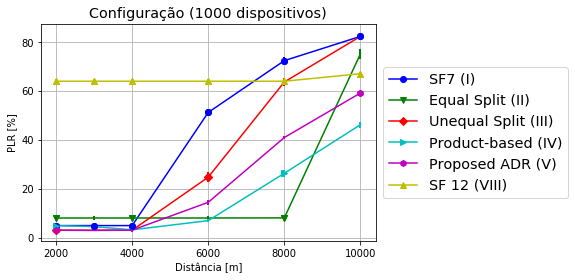

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN3_nDevices/CampaignLoraWAN3.txt


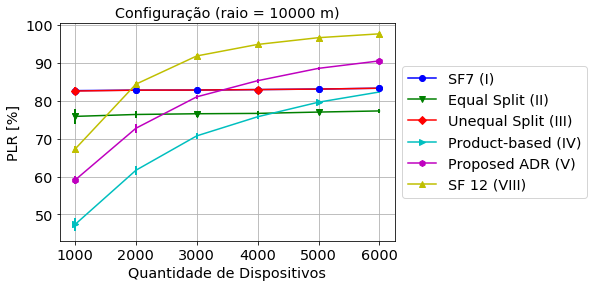

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN3_radius/CampaignLoraWAN3.txt


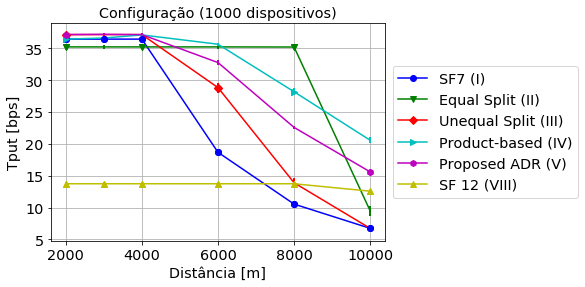

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN3_nDevices/CampaignLoraWAN3.txt


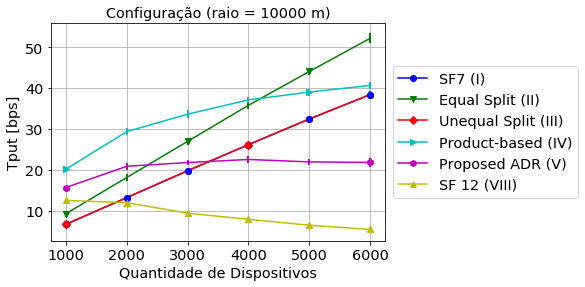

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN3_radius/CampaignLoraWAN3.txt


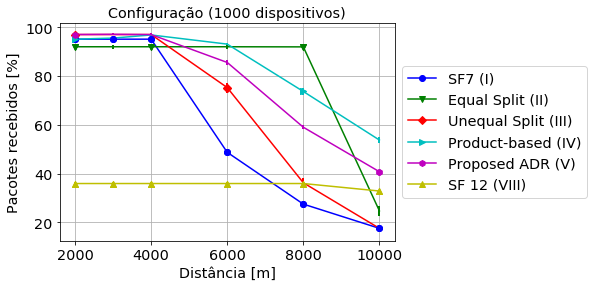

/home/gppcom/2020_1/ns-3-lora-gppcom/./ns-new-implementation/ns-3.29/results_CampaignLoraWAN3_nDevices/CampaignLoraWAN3.txt


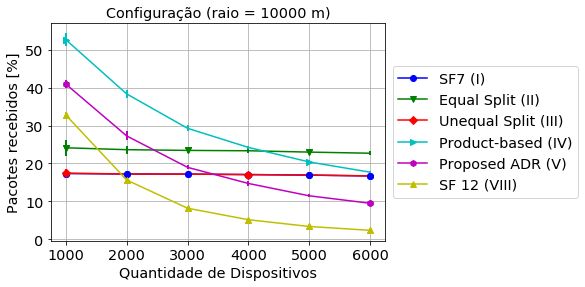

In [137]:
%run plotScript -f "ADR_campaign3_plot.yaml"

Os dados das simulações também podem ser reagurpados para gerar novos gráficos. No exemplo abaixo, os arquivos **ADR_campaign_plot3D.yaml** e **plot3DScript.py** foram ser gerados para plotar gráficos 3D as três campanhas simuladas.

A ideia é tentar visulizar se existe algum padrão de comportamento dado a variação dos parâmetros.



In [18]:
%%file ADR_campaign_plot3D.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWANAll
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 8
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: ./ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code
    # Plot3D configuration
    plot3D:
        nDevices:
            - 1000
            - 3000
            - 6000 
        radius:
            - 3000
            - 6000
            - 10000
        simFiles:
            - ADR_campaign1.yaml
            - ADR_campaign2.yaml
            - ADR_campaign3.yaml
        outputFileNames:
            - CampaignLoraWAN1
            - CampaignLoraWAN2
            - CampaignLoraWAN3

Overwriting ADR_campaign_plot3D.yaml


In [134]:
%%file plot3DScript.py
# Legend
#   RunSeed: 0
#   Seed: 1
#   Algoritmo: 2
#   Radius: 3
#   nDevices: 4
#   appPeriodSeconds:5
#   simulationTime:6
#   PHYTotal: 7
#   PHYSuccessful:8 
#   PHYInterfered: 9
#   PHYNoMoreReceivers: 10
#   PHYUnderSensitivity: 11
#   PHYLostBecauseTX: 12
#   SimulationDuration: 13

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle
import scipy.stats as st
import os
import argparse
import yaml
import matplotlib
from random import randint   
import itertools      

class openSimulation:
    def __init__(self, configurations_file):
        self.email_to = 'fulano@gmail.com'            
        with open(configurations_file, 'r') as f:
            self.doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
        self.campaign_name = os.path.splitext(configurations_file)[0]
        
        # Read commom parameters
        self.showPlot = True;
        self.plotCI = True;                
        self.campaignX = self.doc['scenario']['campaignX']
        self.campaignLines = self.doc['scenario']['campaignLines'][0]
        self.simLocation = str(doc['scenario']['simLocation'])
        self.simulationTime = self.doc['scenario']['simulationTime']
        self.nDevices = self.doc['scenario']['nDevices']
        self.nDevices = list(map(float,self.nDevices))
        self.radius = self.doc['scenario']['radius']
        self.radius = list(map(float,self.radius))
        self.appPeriodSeconds = self.doc['scenario']['appPeriodSeconds']
        self.bPrint = (self.doc['scenario']['bPrint'])
        self.fixedSeed = (self.doc['scenario']['fixedSeed'])
        self.Algoritmo = self.doc['scenario']['algoritmo']
        self.ns3_path = str(self.doc['scenario']['ns3_path'])
        self.ns3_path = os.getcwd() + '/' + self.ns3_path
        self.ns3_script = str(self.doc['scenario']['ns3_script'])
        self.nJobs = int(self.doc['scenario']['jobs'])
        if self.nJobs == 1: # disable the confidence interval
            self.plotCI = False;
        self.filename = str(self.doc['scenario']['filename'])
        self.targetRealocation  = self.doc['scenario']['targetRealocation']
        self.plot3DVariables = list(self.doc['scenario']['plot3D'])
        #print(self.plot3DVariables)
        self.plot3DVar1Values = self.doc['scenario']['plot3D'][self.plot3DVariables[0]]
        #print(self.plot3DVar1Values)
        self.plot3DVar2Values = self.doc['scenario']['plot3D'][self.plot3DVariables[1]]
        #print(self.plot3DVar2Values)
        self.simFiles = self.doc['scenario']['plot3D']['simFiles']
        #print(self.simFiles)
        self.outputFileNames = self.doc['scenario']['plot3D']['outputFileNames']
        self.filename = str(self.doc['scenario']['filename'])
        #print(self.outputFileNames)
        # Contatenate the outputfiles
        import shutil
        # read outputdirectories
        iv = 0
        outputFiles = []
        #print(self.campaignX)
        for ik in range(len(self.outputFileNames)):
            for ic in range(len(self.campaignX)):
                outputFiles += [ self.ns3_path+'/results_'+self.outputFileNames[ik]+'_' + self.campaignX[ic] + '/' + self.outputFileNames[ik]+'.txt' ]
                #print(os.path.exists(outputFiles[iv]))
                iv+=1
        #print(outputFiles)
                            
        with open('output_file_aux.txt','wb') as wfd:
            for f in outputFiles:
                with open(f,'rb') as fd:
                    shutil.copyfileobj(fd, wfd)
        
        infile = "output_file_aux.txt"
        outfile = "output_file.txt"
        delete_list = ["RunSeed,Seed,Algoritmo,Radius,nDevices,appPeriodSeconds,simulationTime,PHYTotal,PHYSuccessful,PHYInterfered,PHYNoMoreReceivers,PHYUnderSensitivity,PHYLostBecauseTX,SimulationDuration,targetRealocation"]
        fin = open(infile)
        fout = open(outfile, "w+")
        for line in fin:
            for word in delete_list:
               line = line.replace(word, "")
            if (line.strip() != ""):
                fout.write(line)
        fin.close()
        fout.close()
              
        
    def doLabelalgoritmo(self, algID):
        # Define labels for plots legends
        if algID == '1':
            return "SF7 (I)"
        elif algID == '2':
            return "Equal Split (II)"
        elif algID == '3':
            return "Unequal Split (III)"
        elif algID == '4':
            return "Product-based (IV)"
        elif algID == '5':
            return "Proposed ADR (V)"
        elif algID == '6':
            return "Random ADR (VI)"
        elif algID == '7':
            return "ADR Realocation (VII)"
        elif algID == '8':
            return "SF 12 (VIII)"
            
    def doLabeltargetRealocation(self, realocRate):
        # Define labels for plots legends
        return "Real. = "+realocRate+" %"
        
    def plot3D(self,curCampaign, metric):

        chFile = 'output_file.txt'
        #print(chFile)
        simTime = np.loadtxt(chFile, skiprows=0, usecols=(6, ), delimiter=',', unpack=False)                
        resalgoritmo = np.loadtxt(chFile, skiprows=0, usecols=(2, ), delimiter=',', unpack=False)
        restargetRealocation = np.loadtxt(chFile, skiprows=0, usecols=(14, ), delimiter=',', unpack=False)
        resradius = np.loadtxt(chFile, skiprows=0, usecols=(3, ), delimiter=',', unpack=False)
        resnDevices = np.loadtxt(chFile, skiprows=0, usecols=(4, ), delimiter=',', unpack=False)
        ressimDur = np.loadtxt(chFile, skiprows=0, usecols=(13, ), delimiter=',', unpack=False)
        resphyTotal = np.loadtxt(chFile, skiprows=0, usecols=(7, ), delimiter=',', unpack=False)
        resphySucc = np.loadtxt(chFile, skiprows=0, usecols=(8, ), delimiter=',', unpack=False)
        markers_on_all = cycle(list(itertools.product([0], [1,2,3,4,5])))
        markersA = cycle(('o', 'v', 'D', '>', 'h', '^', '*', '>', 's', 'H', 'D', 'd'))
        colors = cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))                    
        plt.figure()     
        
        if str(curCampaign) == 'nDevices':
            var2Plot = self.doc['scenario']['plot3D']['radius']
            cur2ndAxisLabel = 'radius';
        elif str(curCampaign) == 'radius':
            var2Plot = self.doc['scenario']['plot3D']['nDevices']
            cur2ndAxisLabel = 'nDevices';
        #print('var2Plot')
        #print(var2Plot)
            
            
        for curLine in self.doc['scenario'][self.campaignLines]: 
            nCols = len(self.doc['scenario'][curCampaign])
            m_plr_3D, m_tput_3D, m_pkt_3D = np.empty((0, nCols)), np.empty((0, nCols)), np.empty((0, nCols))
            #fig = plt.figure()
            fig = plt.figure(figsize=(15, 15))
            ax = fig.gca(projection='3d')
            #print(np.shape(m_plr_3D))
            #color=next(colors)
            #marker=next(markersA)
            #markers_on=next(markers_on_all)
            #label = self.doLabelalgoritmo(iAlg)            
            label = eval('self.doLabel'+self.campaignLines+'(str(curLine))')
            # Current values of line metrics'
            curMetricLine = eval('res'+self.campaignLines)
            #print('curMetricLine = ' +  str(len(curMetricLine)))
            resxData = eval('sorted(self.'+curCampaign+',key=int)')             
            #print('resxData = ' + str(len(resxData)))
            for cur2ndAxis in var2Plot:
                # Current values of y-axis metrics
                curMetric2ndAxis = eval('res'+cur2ndAxisLabel)
                #print('curMetric2ndAxis = ' + str(len(curMetric2ndAxis)))
                m_plr, m_plrCI, m_tput, m_tputCI, m_pkt, m_pktCI = [], [], [], [], [], []
                curXaxis = sorted(self.doc['scenario'][curCampaign],key=int)
                for varParam in curXaxis:                
                    # Current values of y-axis metrics
                    curMetricAxis = eval('res'+curCampaign)
                    #print('curMetricAxis = ' + str(len(curMetricAxis)))
                    
                    resalgIndexs = ( ( curMetric2ndAxis == int(cur2ndAxis) ) & ( curMetricLine == int(curLine) ) & ( curMetricAxis == int(varParam) ) ) 
                    # 
                    #print('curMetric2ndAxis')
                    #print(curMetric2ndAxis[resalgIndexs])
                    #
                    #print('curMetricLine')
                    #print(curMetricLine[resalgIndexs])
                    #
                    #print('curMetricAxis')
                    #print(curMetricAxis[resalgIndexs])
                    #
                    if str(curCampaign) == 'radius':
                        #resalgIndexs = (resalg == int(iAlg)) & (resradius == int(varParam))
                        chtitle = 'Configuração ('+ self.doc['scenario']['nDevices'][0] +' dispositivos) - ' + label
                        xlabel='Distância [m]'
                        ylabel='Quantidade de Dispositivos'
                        #resxData = sorted(self.radius,key=int) 
                        # label = self.doLabel(iAlg)
                    elif str(curCampaign) == 'nDevices':
                    #    resalgIndexs = (resalg == int(iAlg)) & (resnDevices == int(varParam))                    
                        xlabel='Quantidade de Dispositivos'
                        ylabel='Distância [m]'
                        chtitle = 'Configuração (raio = '+ self.doc['scenario']['radius'][0] +' m) - ' + label
                    #    resxData = sorted(self.nDevices,key=int)
                    #    label = self.doLabel(iAlg)
                    elif str(curCampaign) == 'targetRealocation':
                    #    resalgIndexs = (resalg == int(iAlg)) & (restargetRealocation == int(varParam))                    
                        xlabel='Taxa de realocação [%]'
                        chtitle = 'Configuração ('+ self.doc['scenario']['nDevices'][0] +' dispositivos, raio = '+ self.doc['scenario']['radius'][0]+')'
                    #    resxData = self.targetRealocation

                    # Plr Evaluation
                    if metric=='PLR':                
                        # Calculate PLR line
                        plr = 100*( resphyTotal[resalgIndexs]-resphySucc[resalgIndexs] ) / resphyTotal[resalgIndexs]
                        m_plr = np.append(m_plr, np.mean(plr))
                        # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                        #l, h = st.t.interval(0.95, len(plr)-1, loc=np.mean(plr), scale=st.sem(plr))
                        #l,h = st.norm.interval(0.95, loc=np.mean(plr), scale=st.sem(plr))                                                            
                        #m_plrCI = np.append(m_plrCI, h)
                    elif metric=='Tput':
                        # TODO
                        # Calculate PLR line
                        tput = 23*( resphySucc[resalgIndexs] ) / float(self.simulationTime)
                        m_tput = np.append(m_tput, np.mean(tput))
                        # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                        #l, h = st.t.interval(0.95, len(tput)-1, loc=np.mean(tput), scale=st.sem(tput))
                        #l,h = st.norm.interval(0.95, loc=np.mean(tput), scale=st.sem(tput))                    
                        #m_tputCI = np.append(m_tputCI, h)
                    elif metric=='Pkt':
                        # TODO
                        # Calculate PLR line
                        pkt = 100 * ( resphySucc[resalgIndexs] ) / resphyTotal[resalgIndexs]
                        m_pkt = np.append(m_pkt, np.mean(pkt))
                        # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                        #l, h = st.t.interval(0.95, len(pkt)-1, loc=np.mean(pkt), scale=st.sem(pkt))
                        #l,h = st.norm.interval(0.95, loc=np.mean(pkt), scale=st.sem(pkt))                    
                        #m_pktCI = np.append(m_pktCI, h)
                
                # colocar if de métricas
                if metric=='PLR':
                    #print('m_plr_3D')
                    m_plr_3D = np.append(m_plr_3D, [m_plr], axis=0)
                    #print(np.shape(m_plr_3D))
                    #print(m_plr)
                    ax.plot(int(cur2ndAxis)*np.ones(len(curXaxis)), list(map(float, curXaxis)), m_plr)
                    
                elif metric=='Tput':
                    #print('m_tput_3D')
                    m_tput_3D = np.append(m_tput_3D, [m_tput], axis=0)
                    #print(m_tput)
                    #print(np.shape(m_tput_3D))
                    ax.plot(int(cur2ndAxis)*np.ones(len(curXaxis)), list(map(float, curXaxis)), m_tput)

                elif metric=='Pkt':
                    #print('m_pkt_3D')
                    m_pkt_3D = np.append(m_pkt_3D, [m_pkt], axis=0)
                    #print(m_pkt)
                    #print(np.shape(m_tput_3D))
                    ax.plot(int(cur2ndAxis)*np.ones(len(curXaxis)), list(map(float, curXaxis)),m_pkt)
            
            # Plot figure
            outputDir = self.ns3_path+'/results_'+ self.filename
            params = {'legend.fontsize': 'x-large',
             'axes.labelsize': 'x-large',
             'axes.titlesize':'x-large',
             'xtick.labelsize':'x-large',
             'ytick.labelsize':'x-large'}
            plt.rcParams.update(params)        
            os.makedirs(outputDir+"/ps", exist_ok=True)
            os.makedirs(outputDir+"/png", exist_ok=True)
        
            if metric=='PLR':        
                # Show and save PLR plot
                zlabel="PLR [%]"
                if bool(self.plotCI):
                    imgfilename = 'PLR_CI_'+curCampaign
                else:
                    imgfilename = 'PLR_'+curCampaign
            elif metric=='Tput':
                # Show and save PLR plot
                zlabel="Tput [bps]"
                if bool(self.plotCI):
                    imgfilename = 'TPUT_CI_'+curCampaign
                else:
                    imgfilename = 'TPUT_'+curCampaign    
            elif metric=='Pkt':
                # Show and save PLR plot
                zlabel="Pacotes recebidos [%]"
                if bool(self.plotCI):
                    imgfilename = 'PKT_CI_'+curCampaign
                else:
                    imgfilename = 'PKT_'+curCampaign    

            # Plot general configuration
            plt.savefig(outputDir+"/png/"+imgfilename+".png")
            plt.savefig(outputDir+"/ps/"+imgfilename+".eps") 
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            ax.set_zlabel(zlabel)
            #plt.zlabel(zlabel)
            #plt.xlabel(xlabel)
            #plt.ylabel(ylabel)
            plt.title(chtitle)
            #plt.legend(loc='best', numpoints=1) 
            #plt.tight_layout()
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.grid()
            if bool(self.showPlot):
                plt.show()
            else:
                plt.close()

                
parser = argparse.ArgumentParser()
parser.add_argument("-f", "--file", type=str, help='Configuration File')
args = parser.parse_args()

configurations_file = args.file; 
with open(configurations_file, 'r') as f:
    doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
    campaign_name = os.path.splitext(configurations_file)[0]

# print(doc)
print('Simulação escolhida: ')
campaign = doc['scenario']['campaignX']
#print(campaign)
                 

simu = openSimulation(configurations_file)
for iMet in ['PLR', 'Tput', 'Pkt']:
    for simC in campaign:
        if str(simC) == 'nDevices' or str(simC) == 'radius' or str(simC) == 'targetRealocation':
            simu.plot3D(simC,iMet);
        else:
            print('Invalid simulation campaign: verify} the campaign parameter!')    
    

Overwriting plot3DScript.py


Para chamar lotar os novos gráficos, digite o seguinte comando:

Simulação escolhida: 


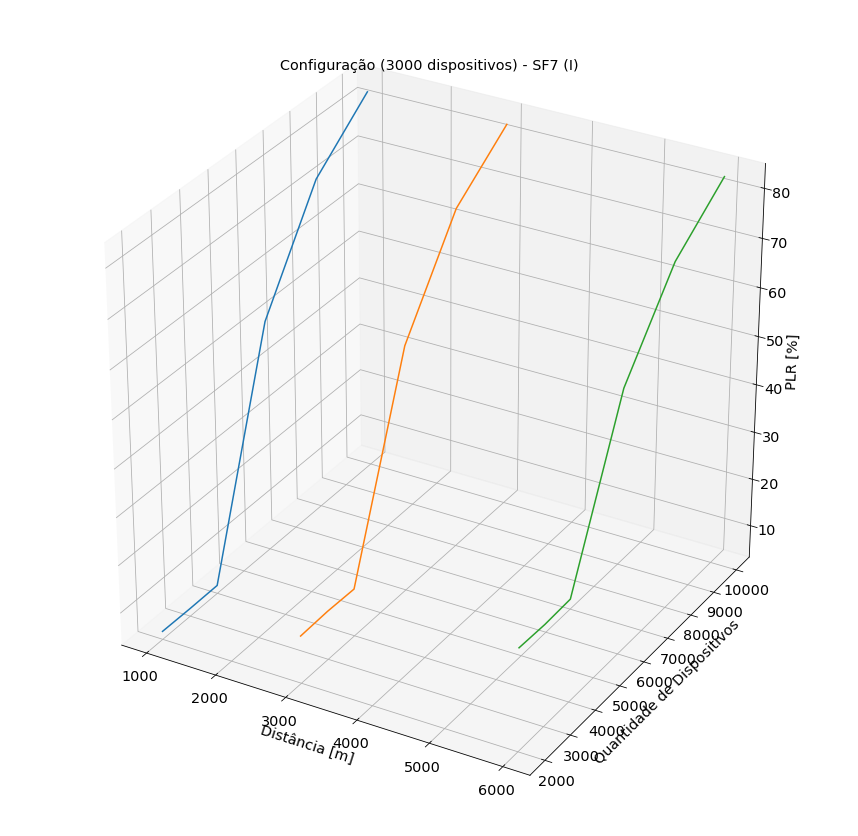

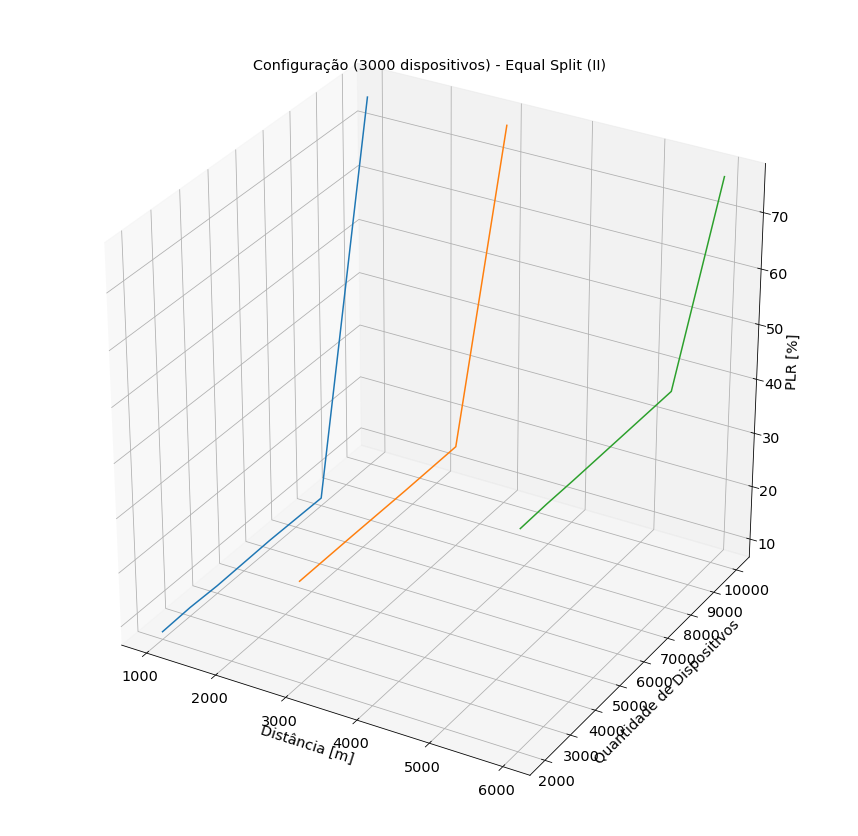

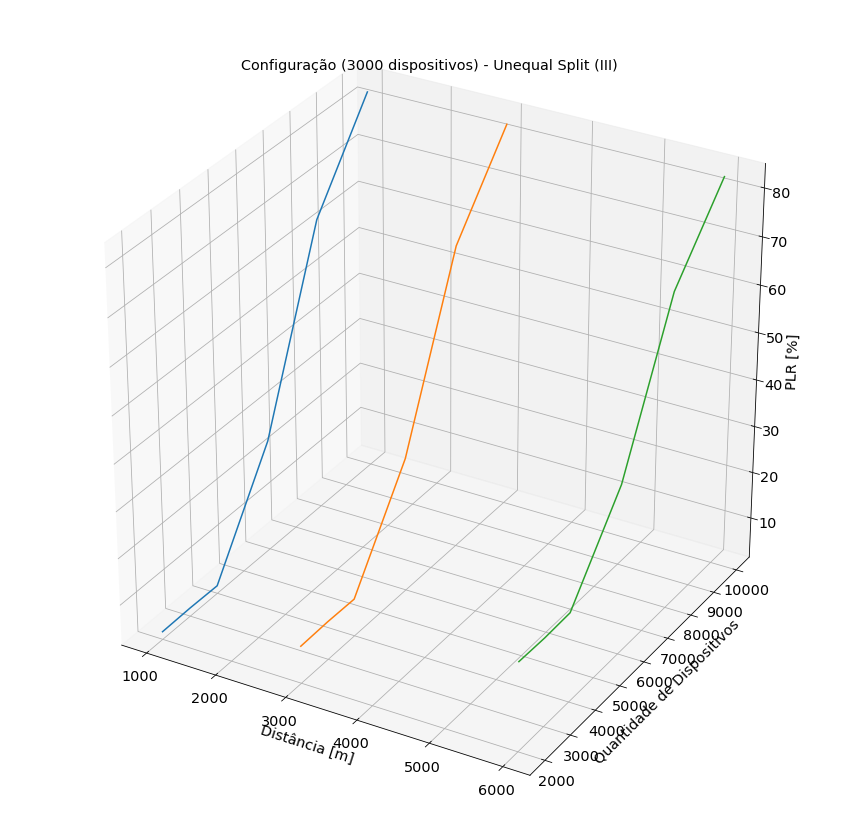

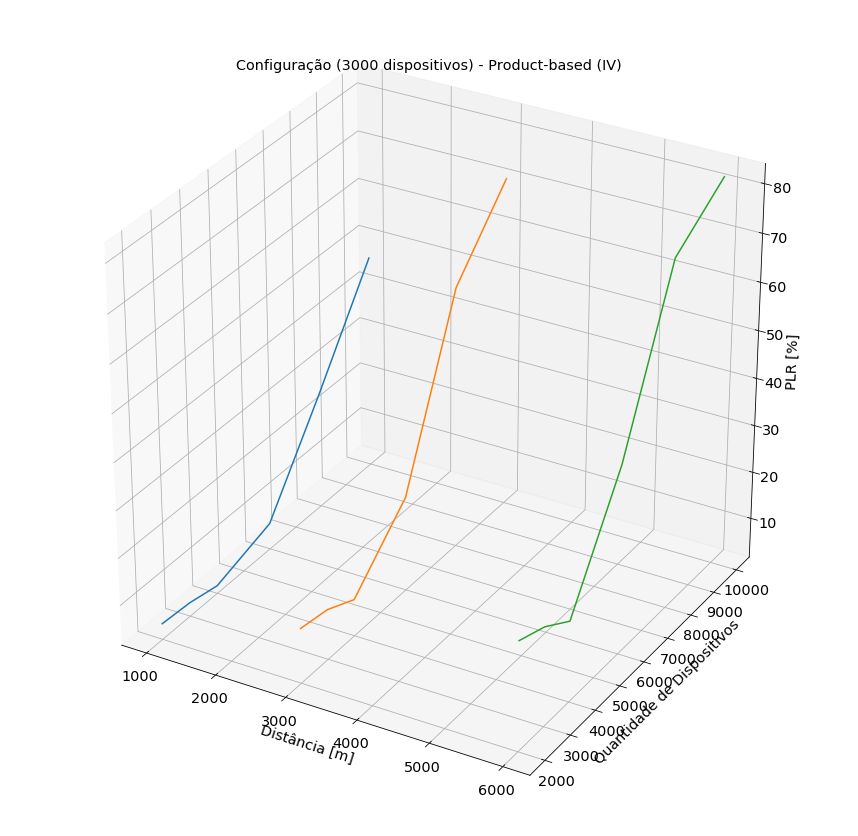

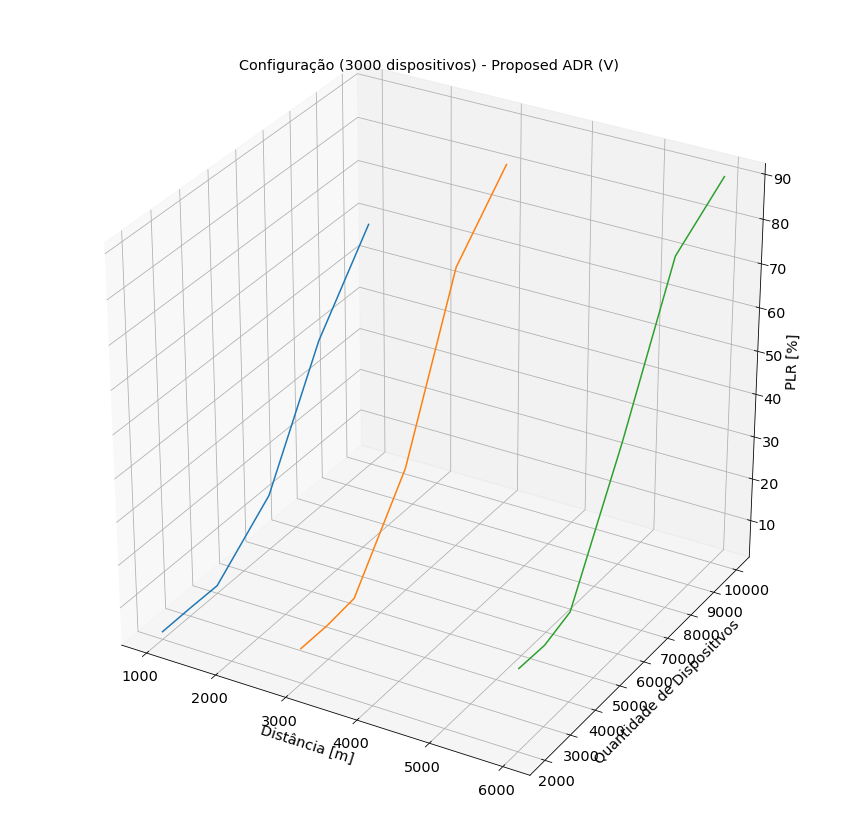

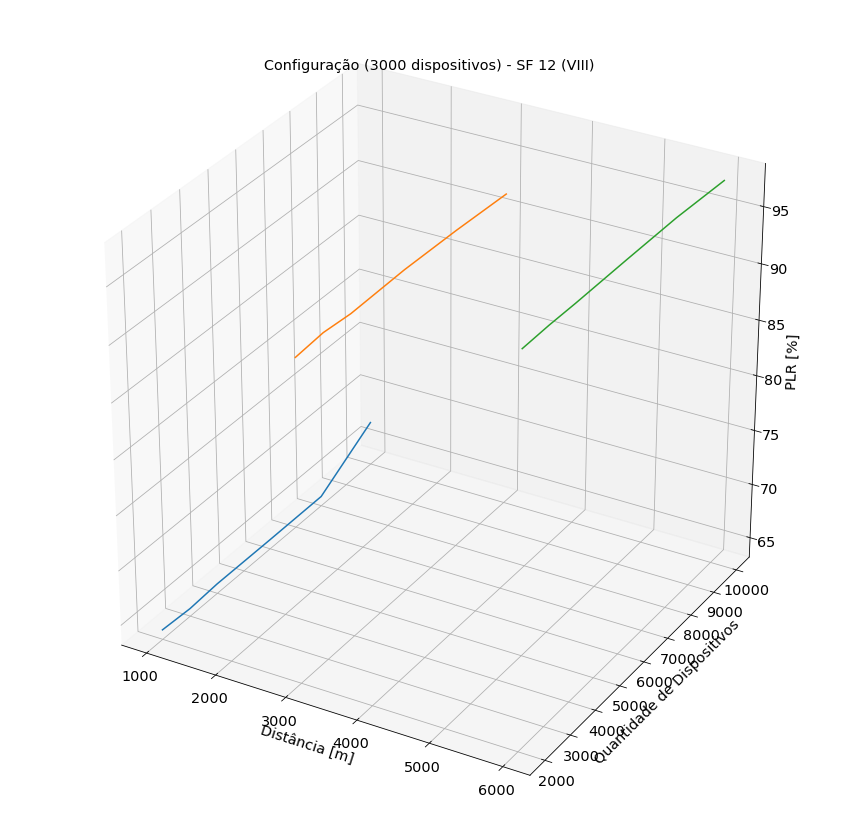

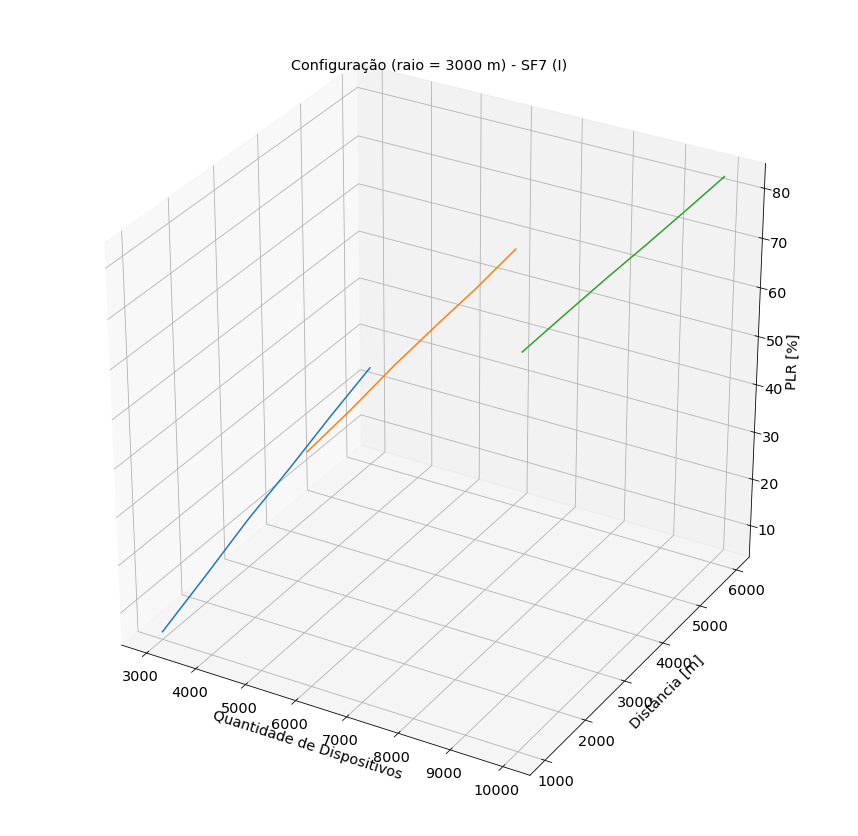

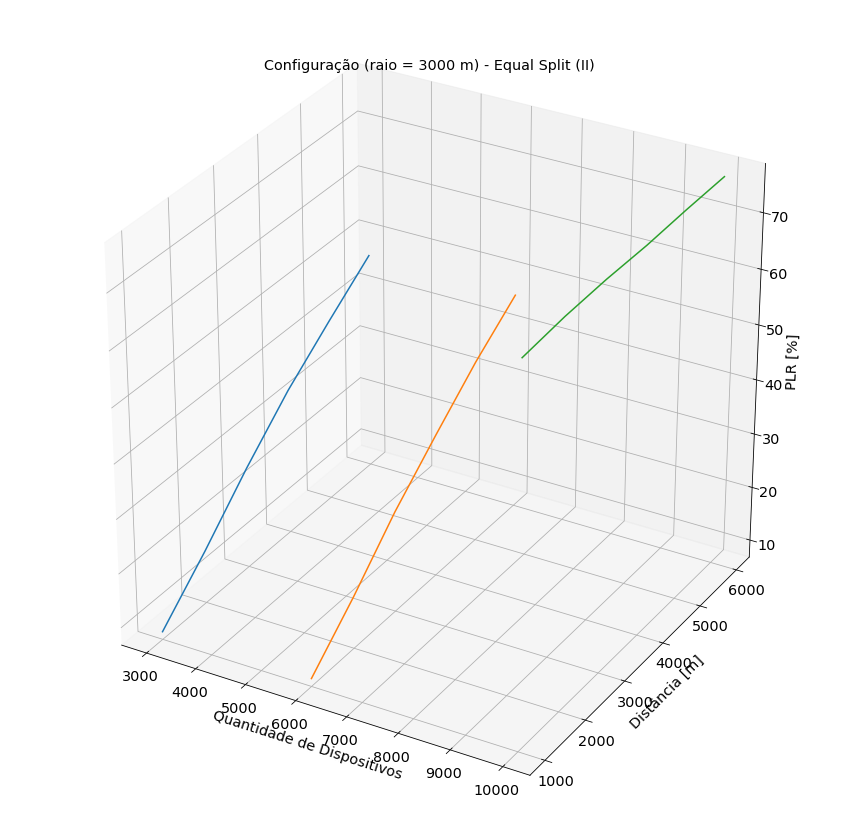

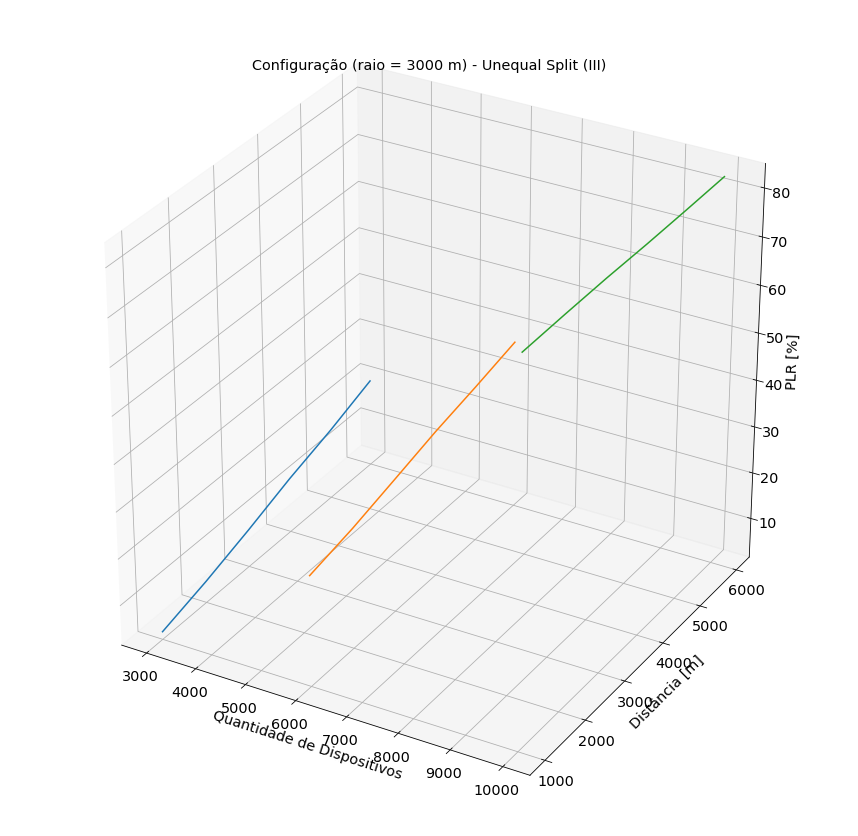

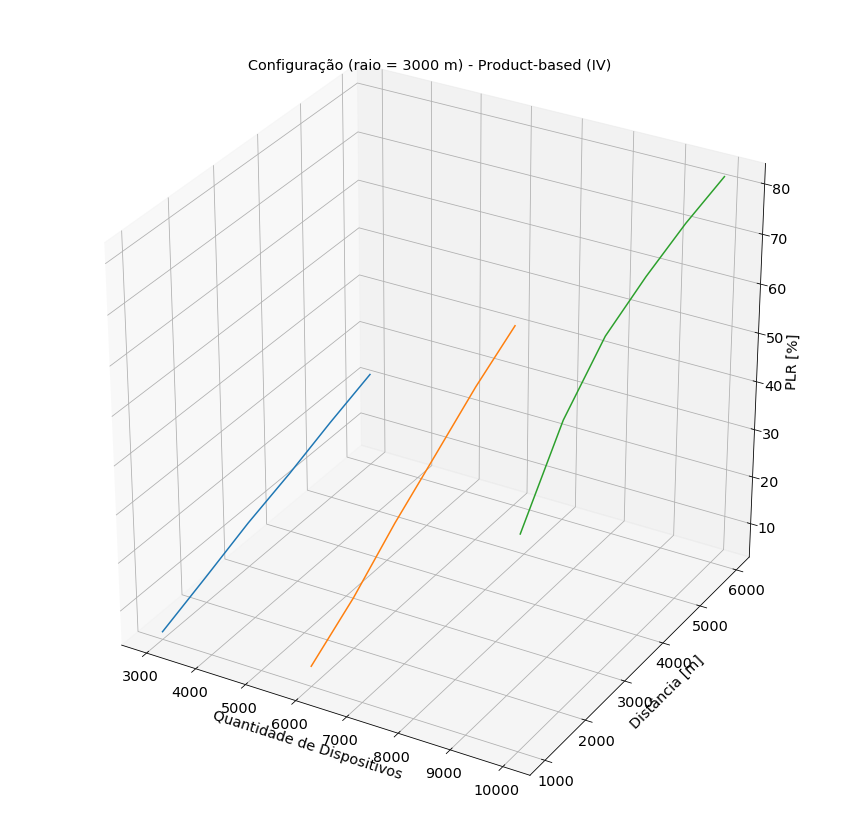

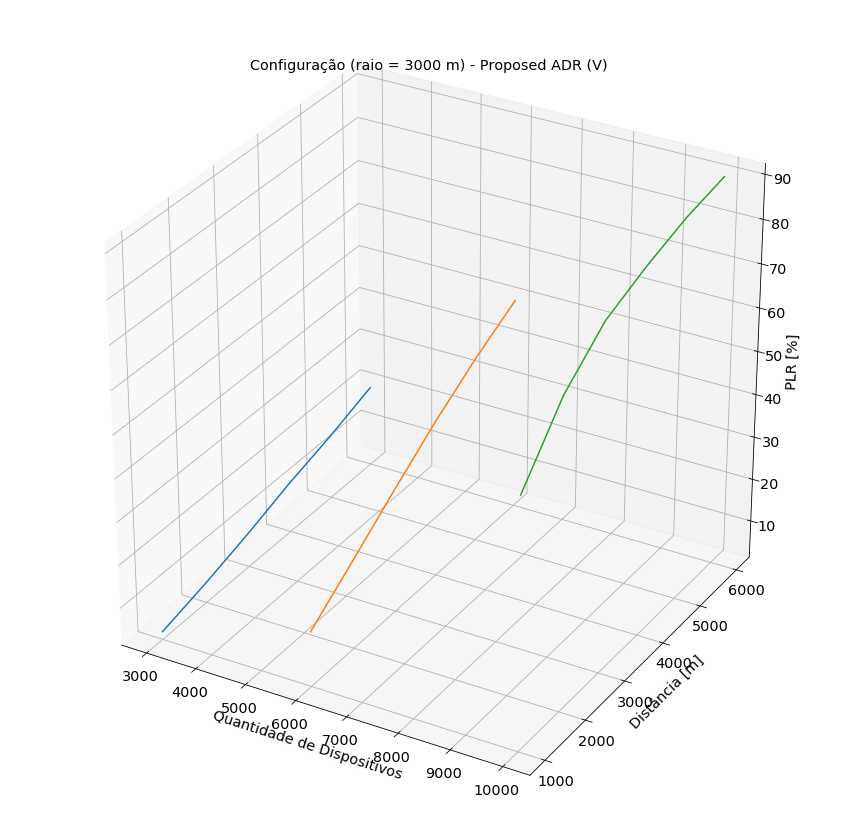

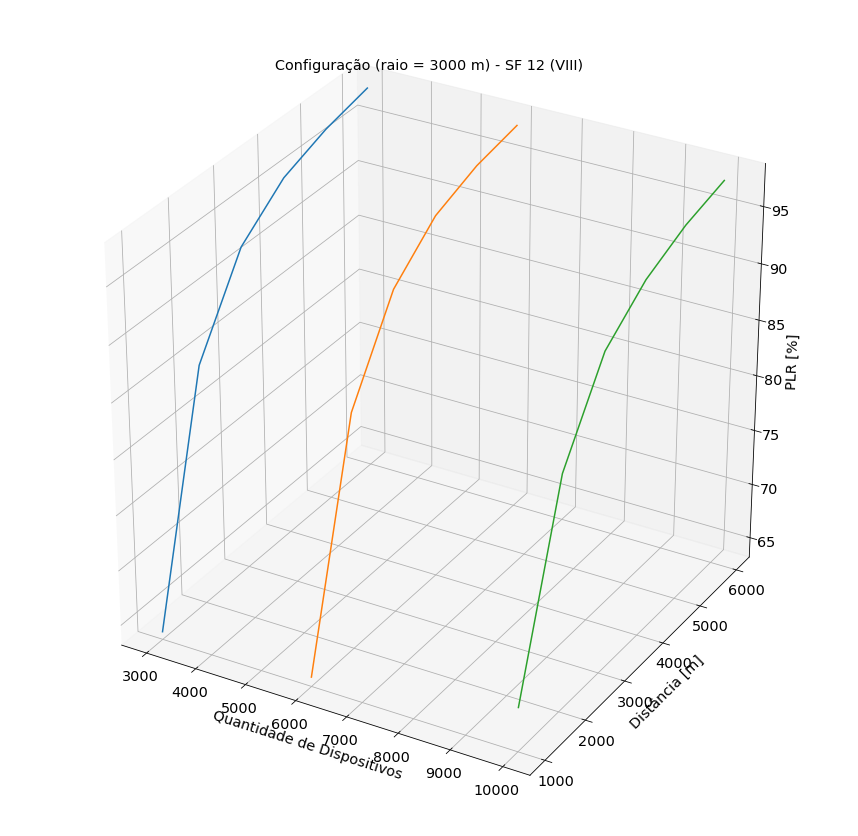

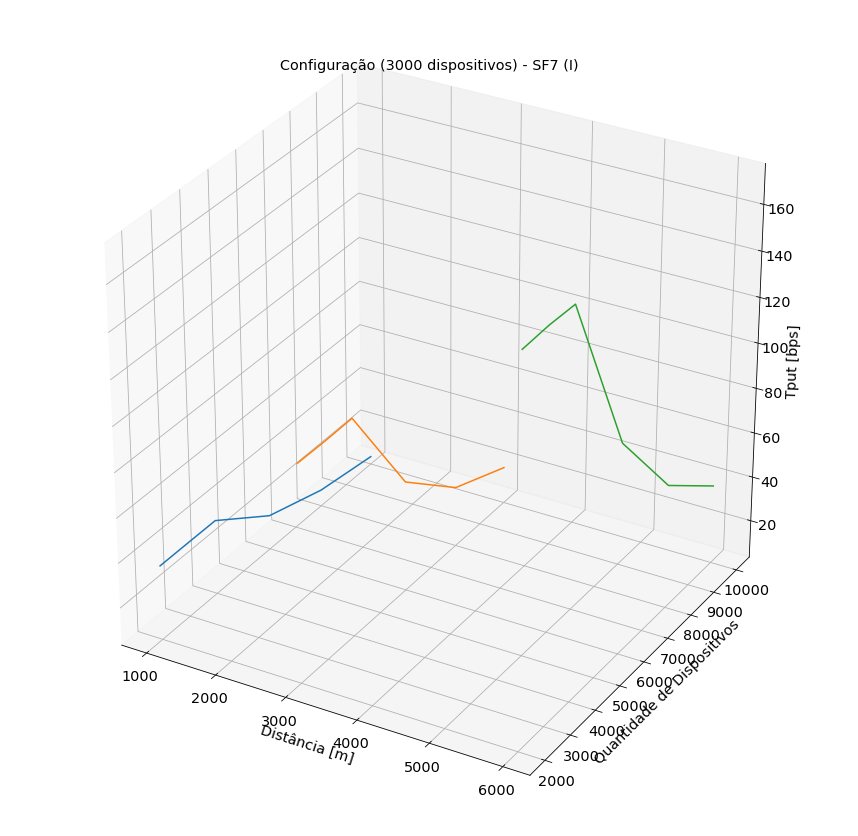

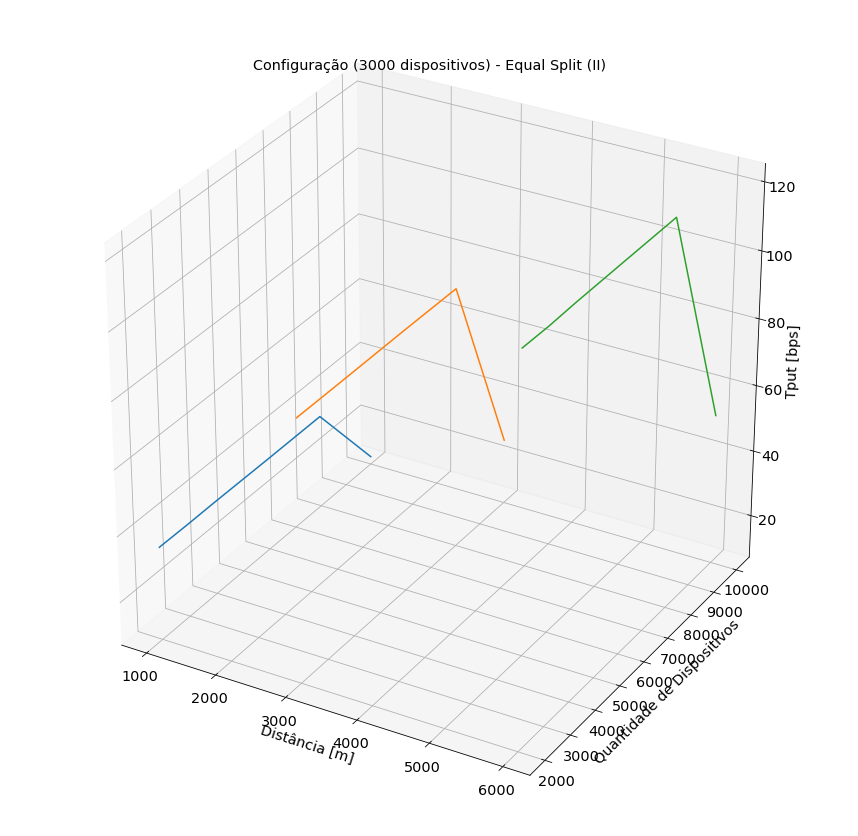

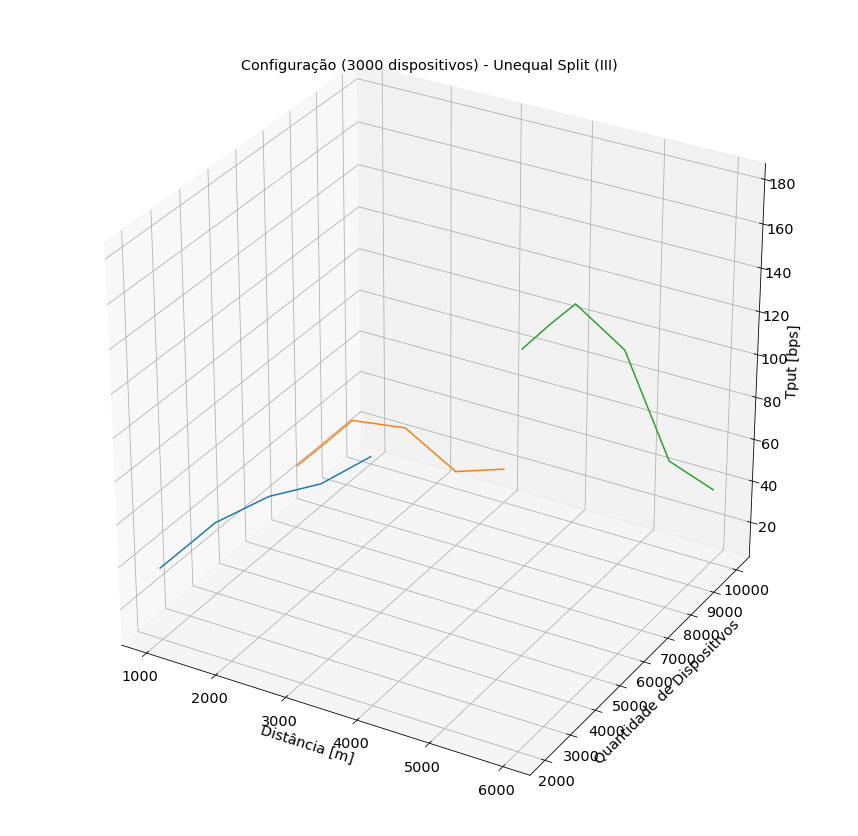

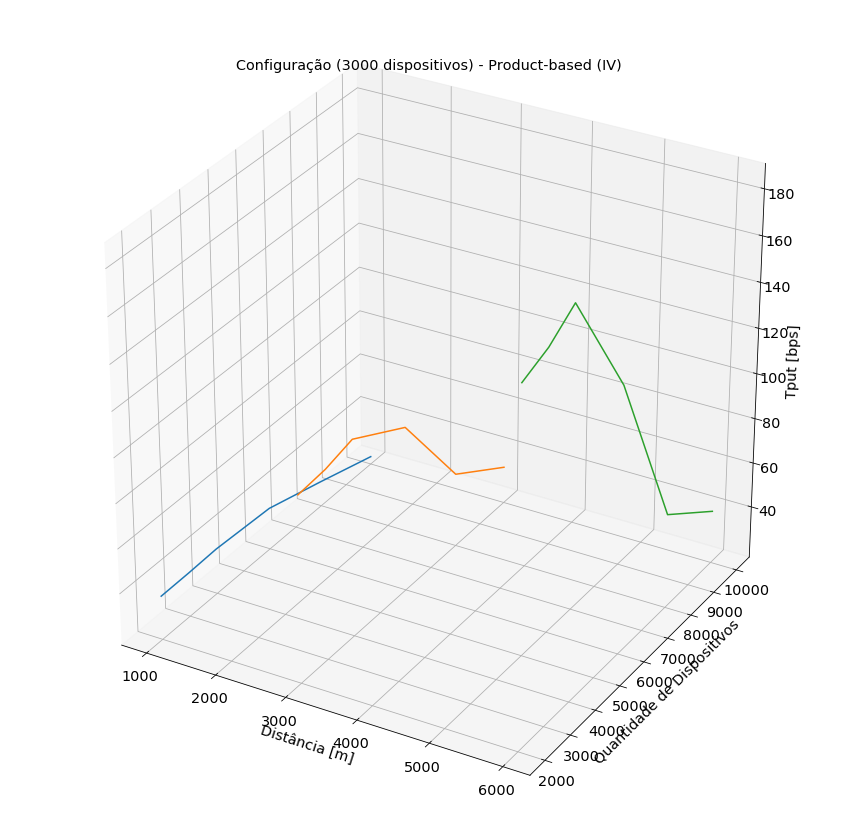

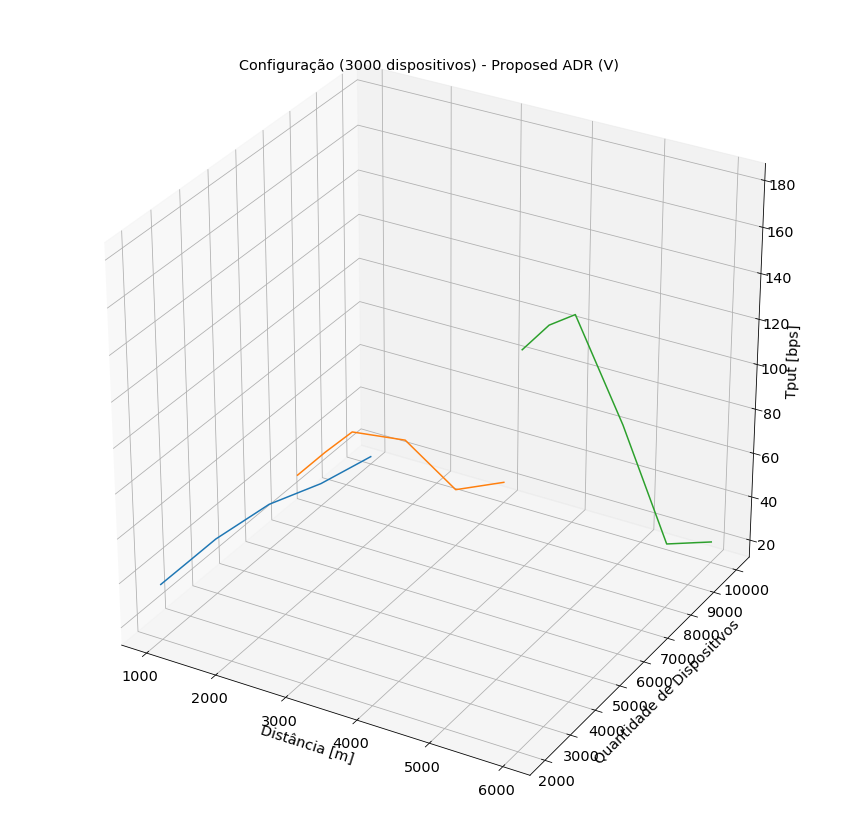

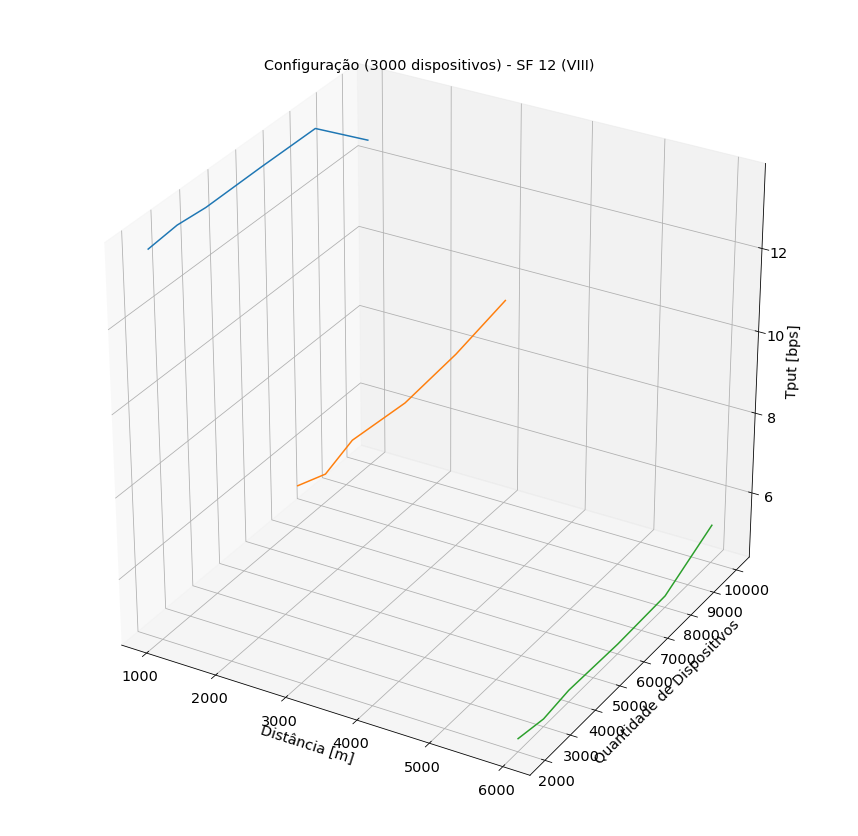

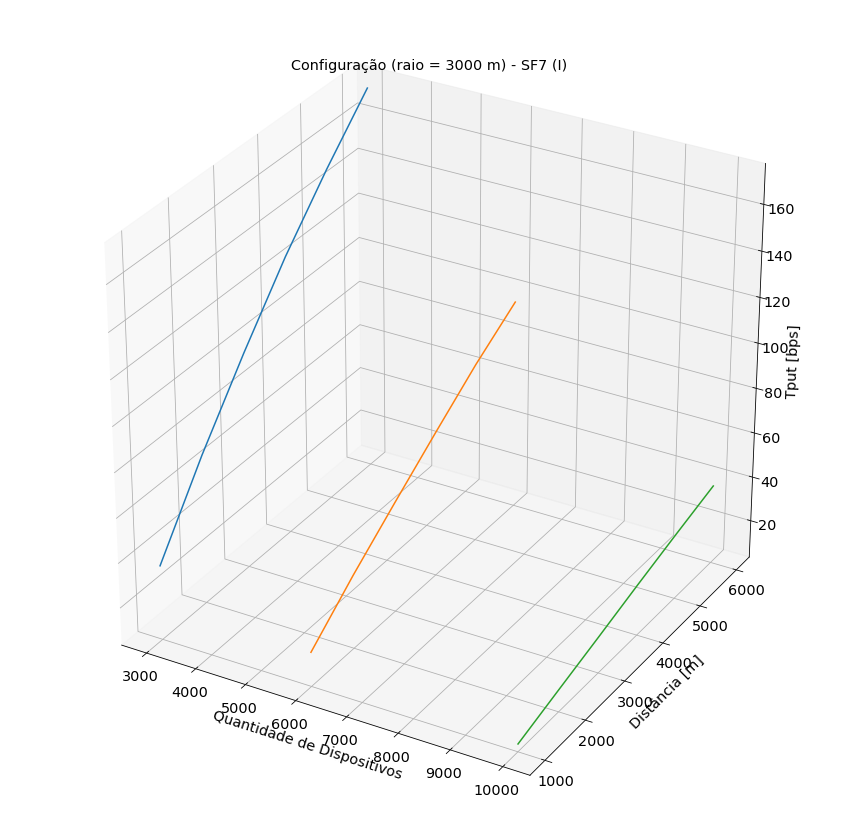

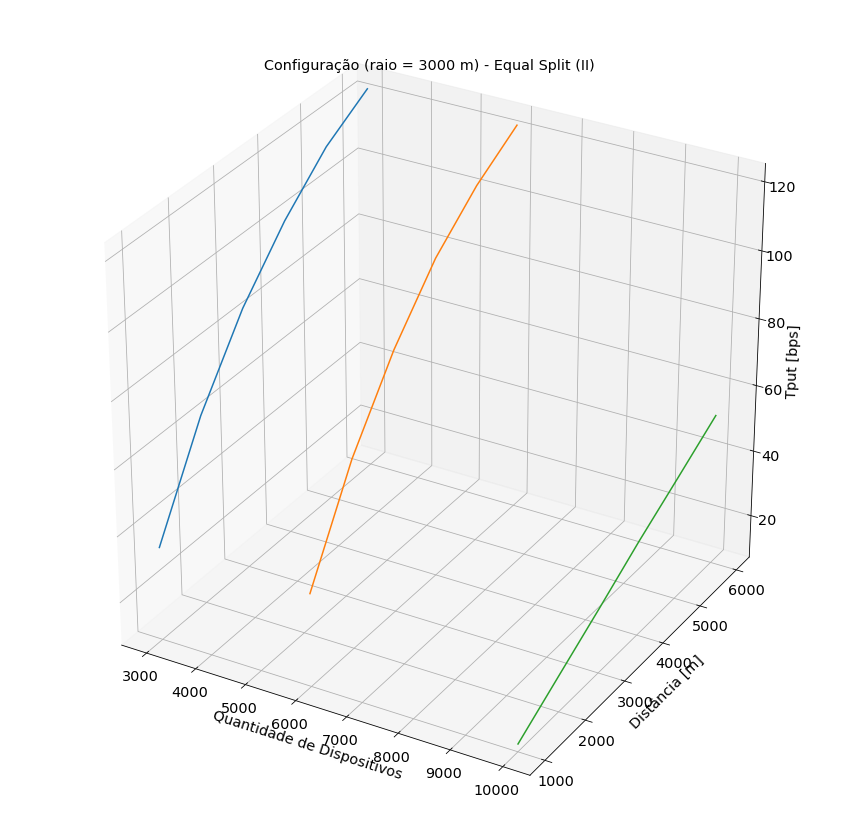

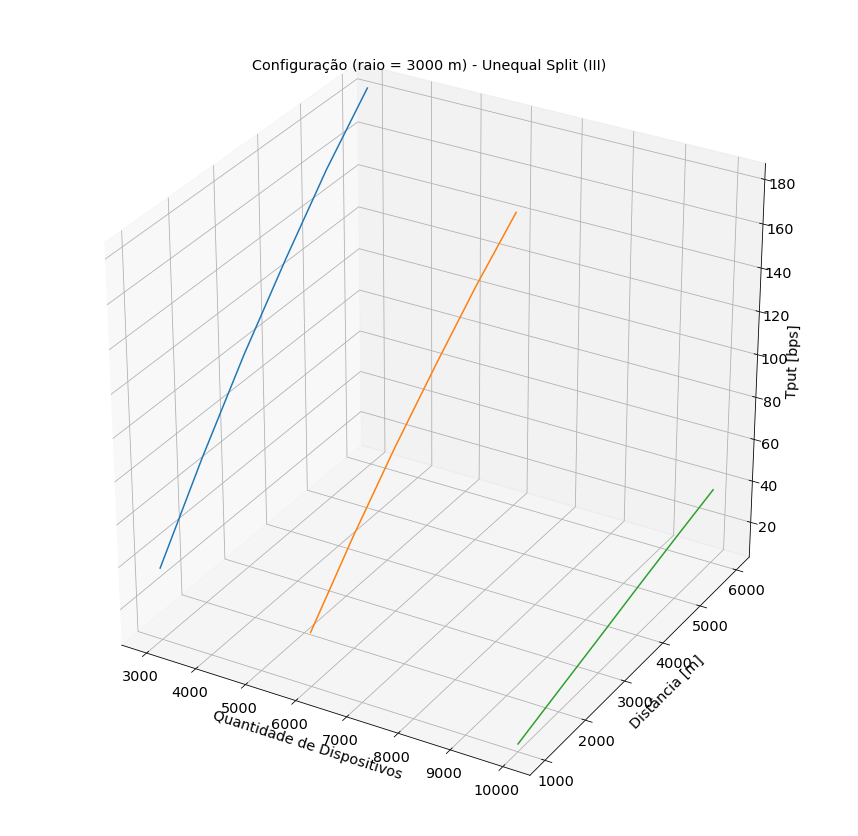

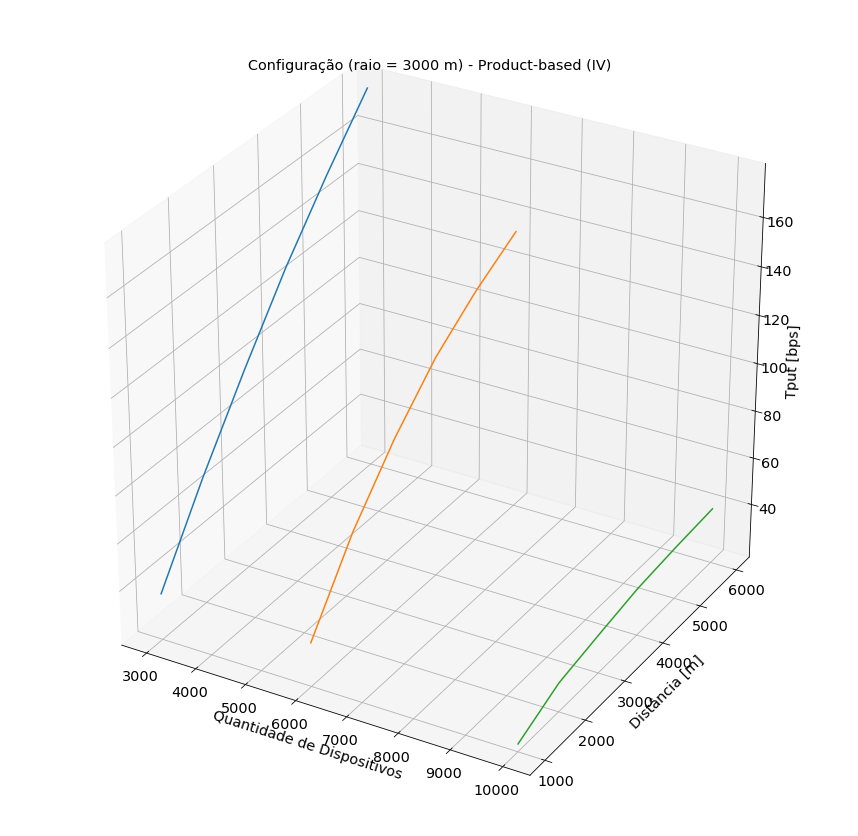

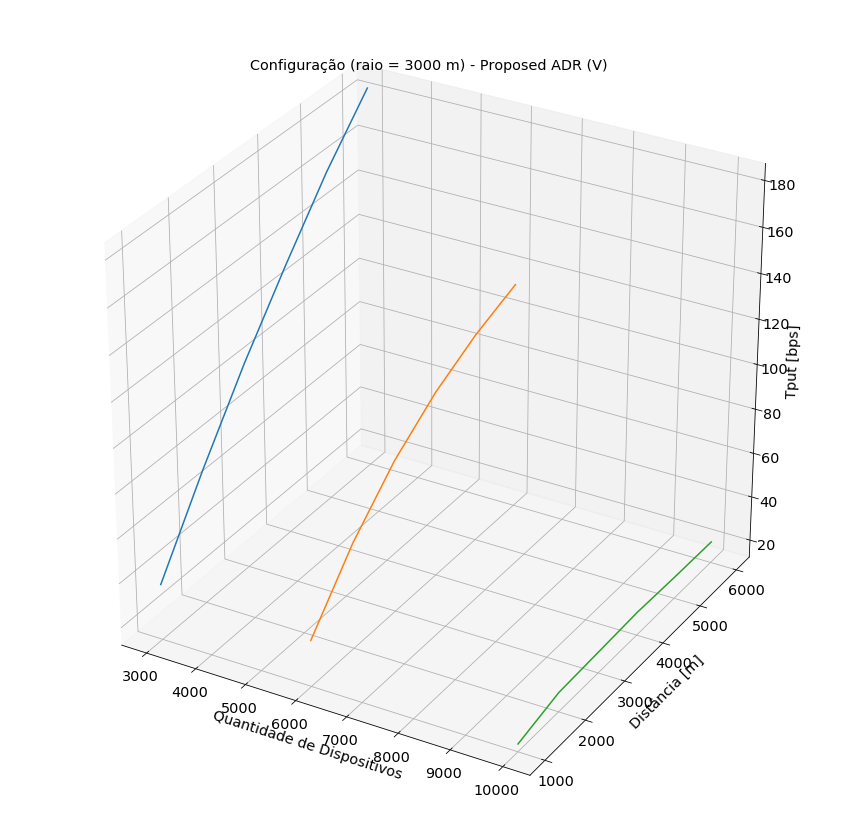

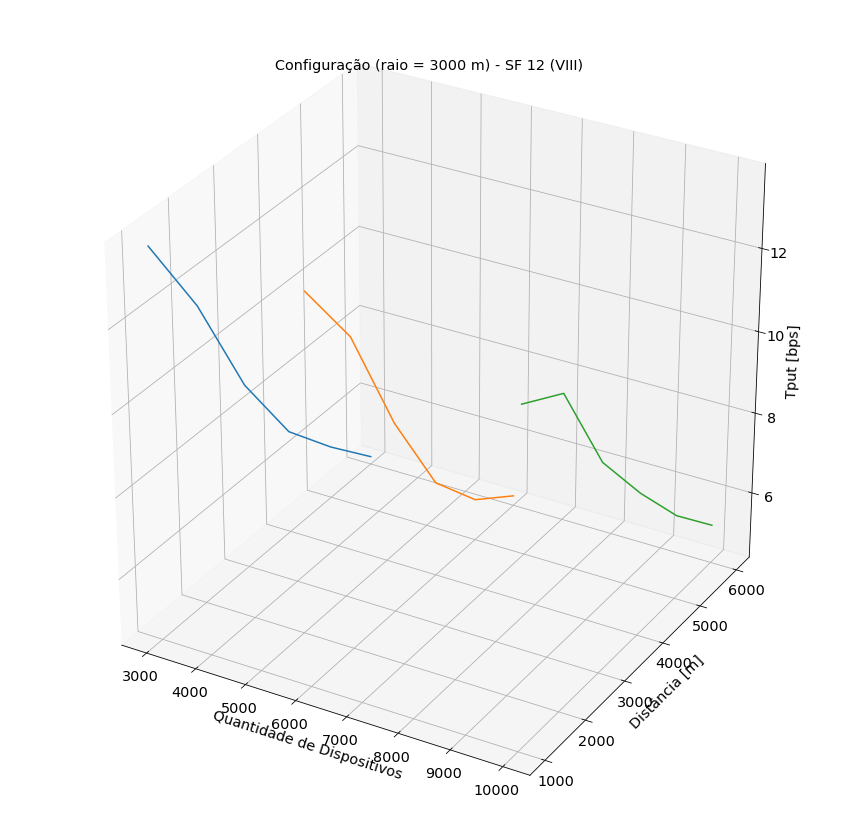

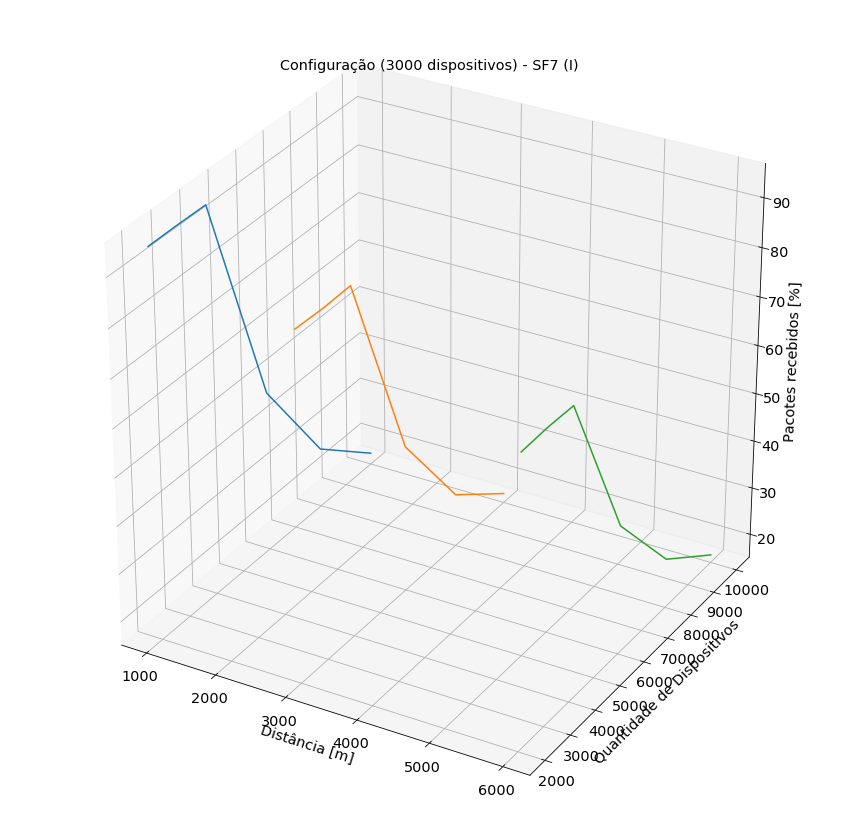

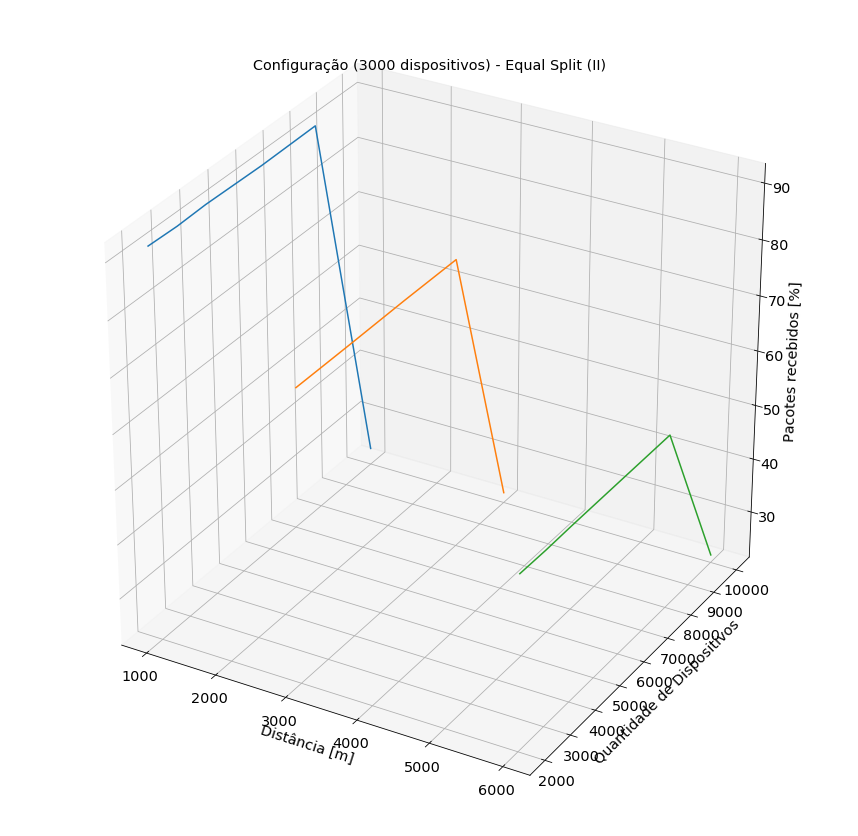

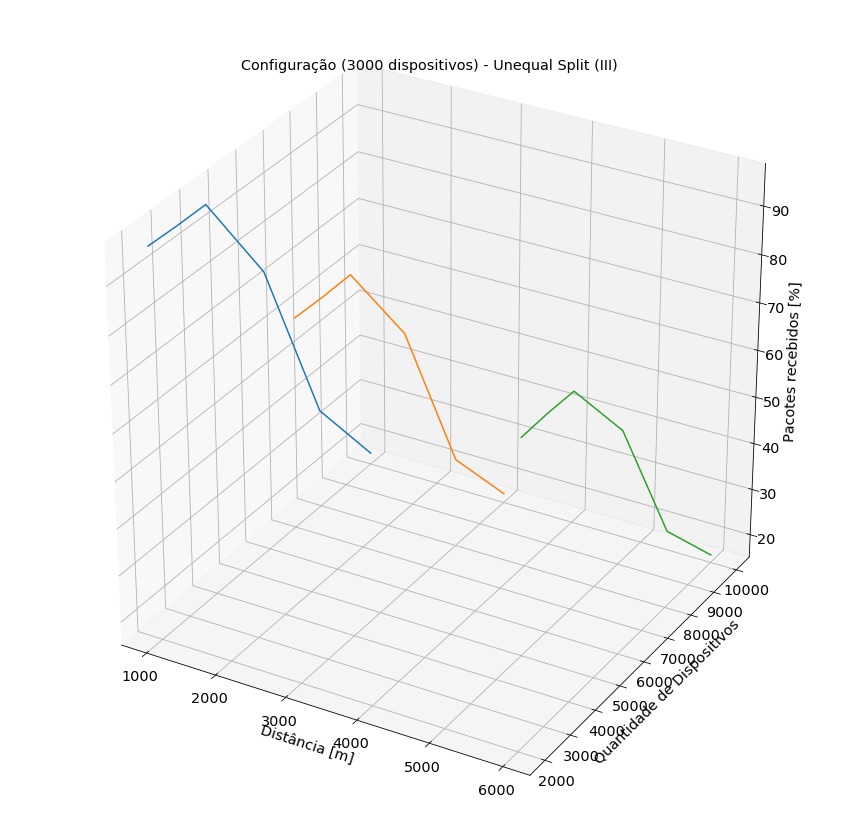

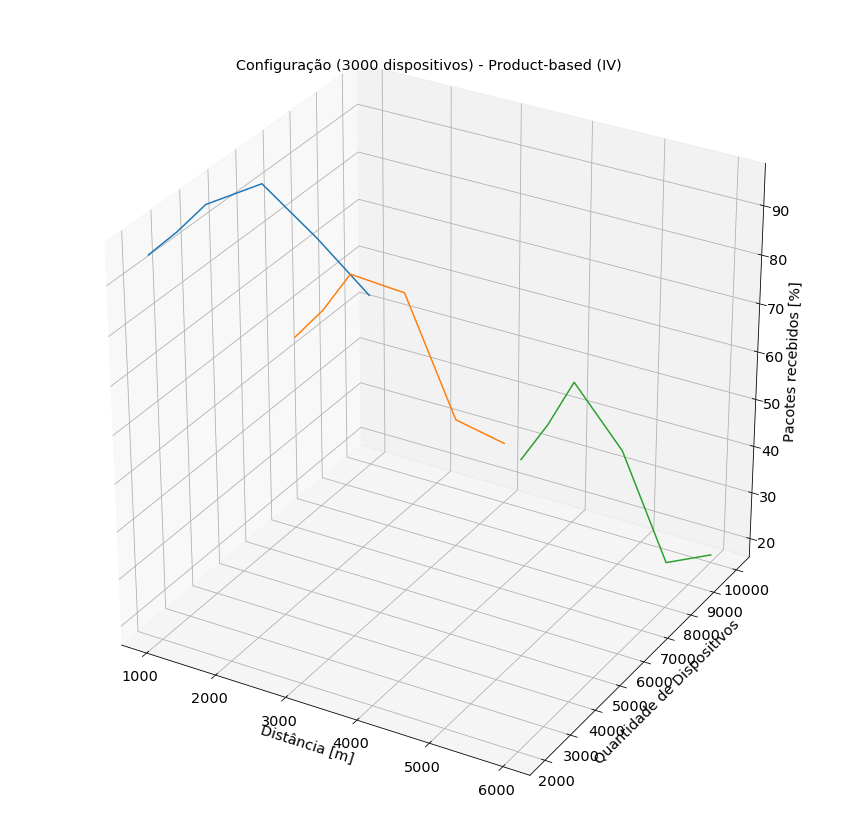

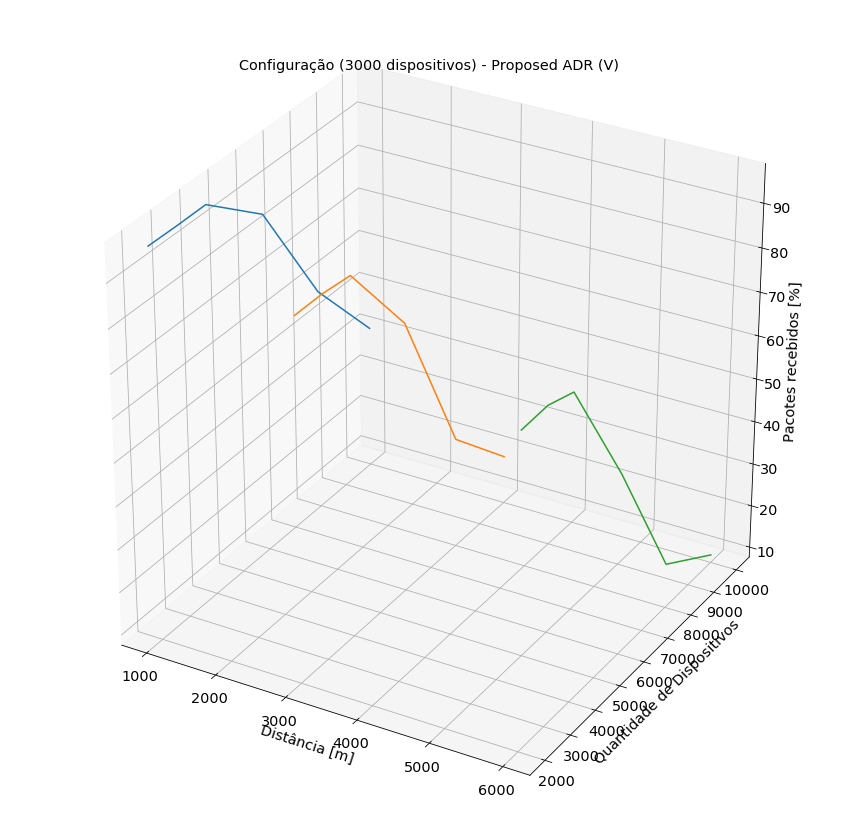

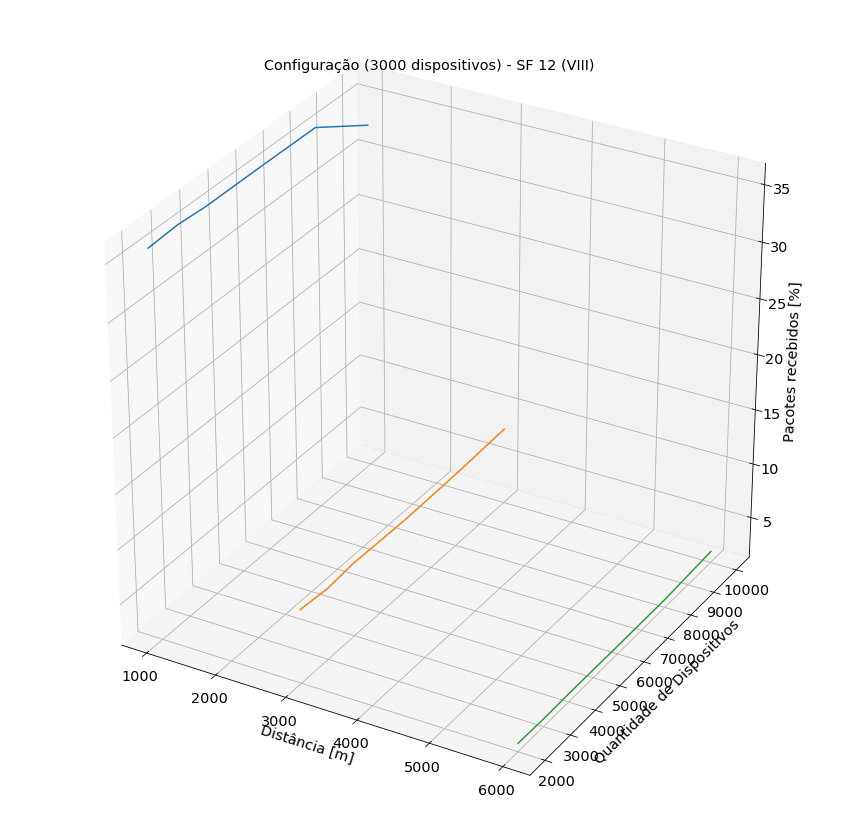

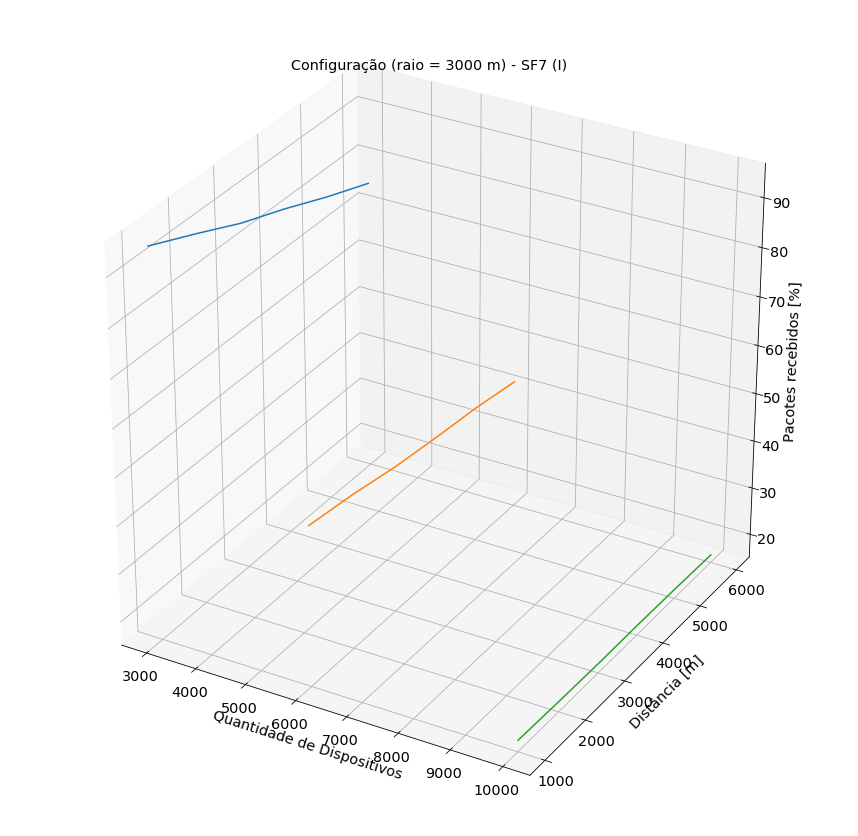

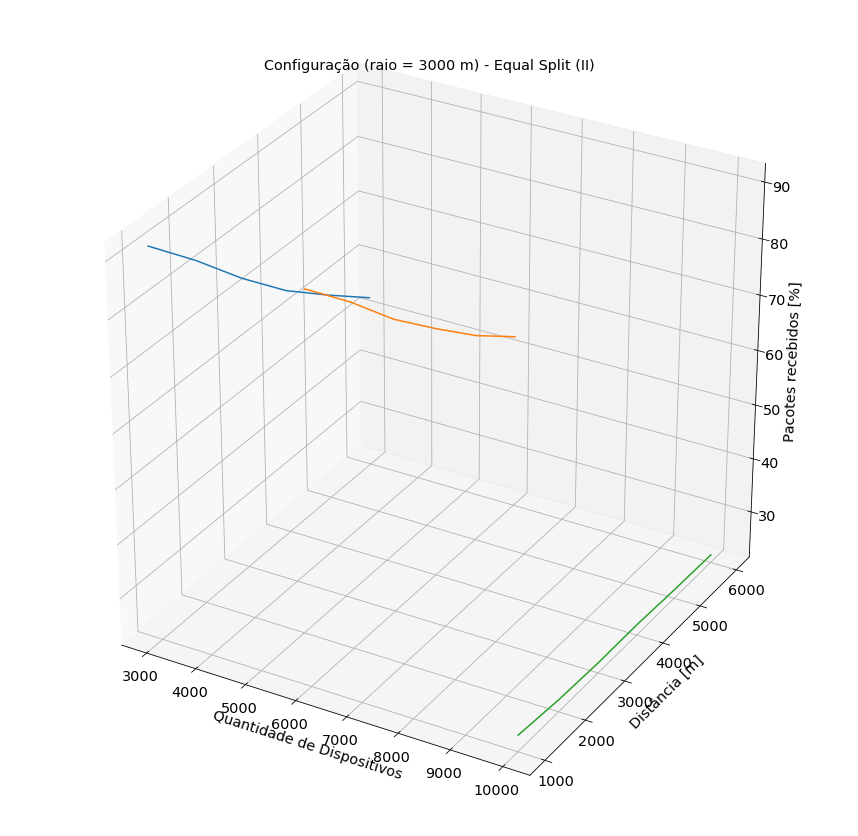

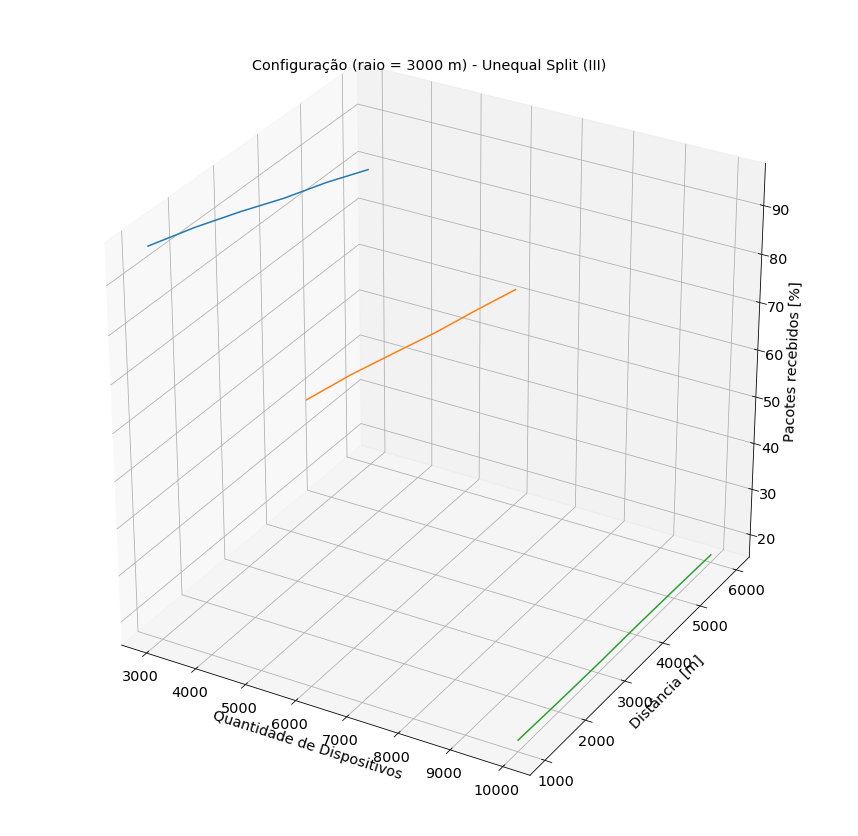

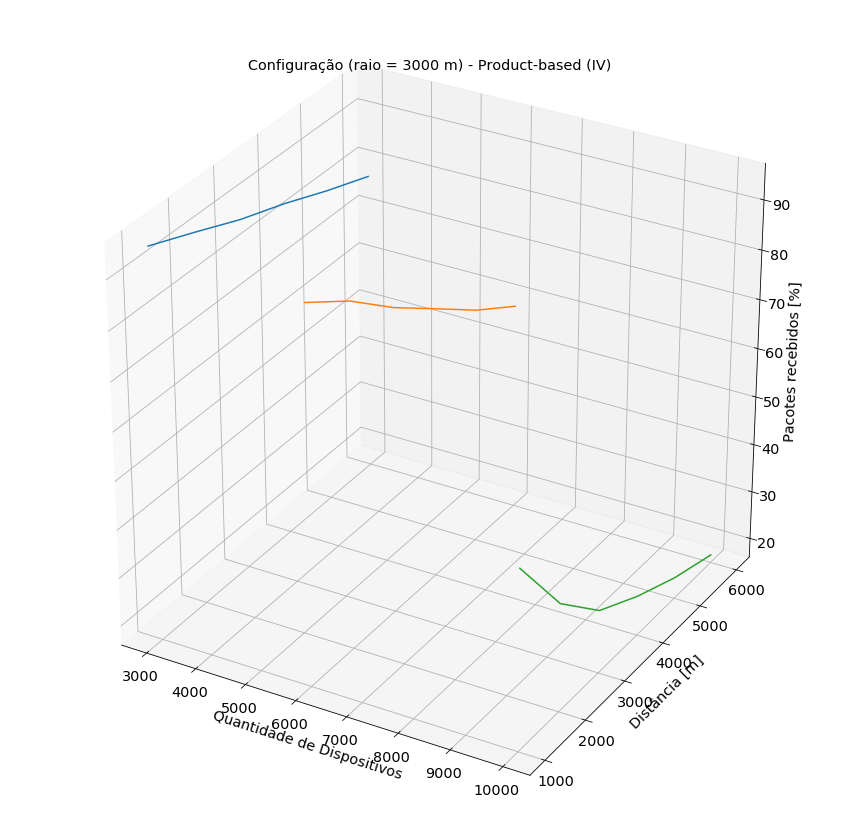

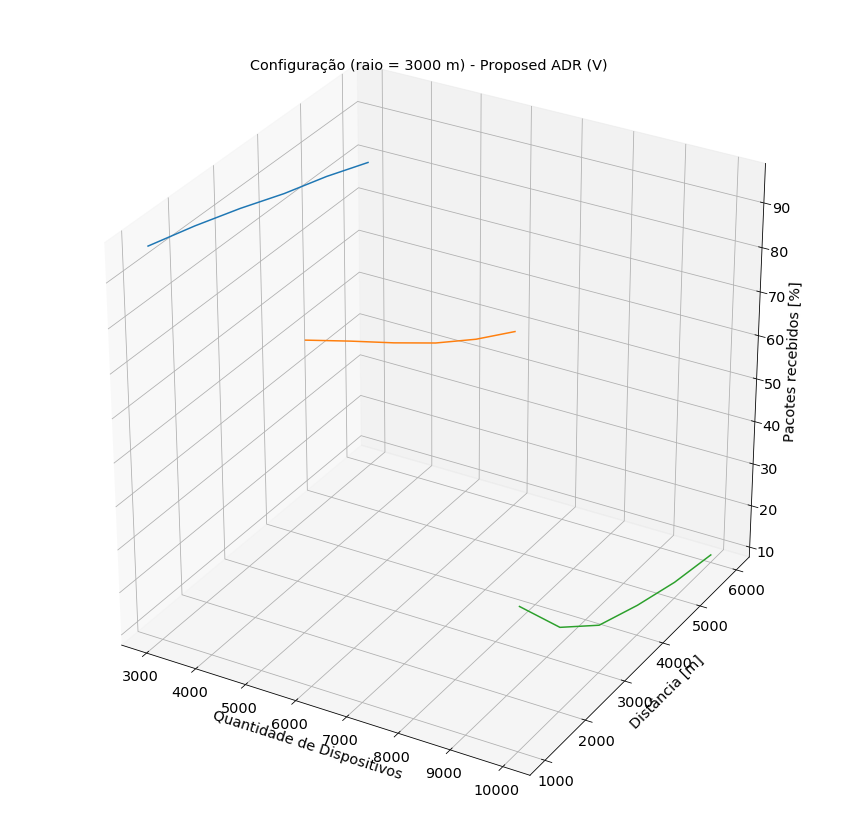

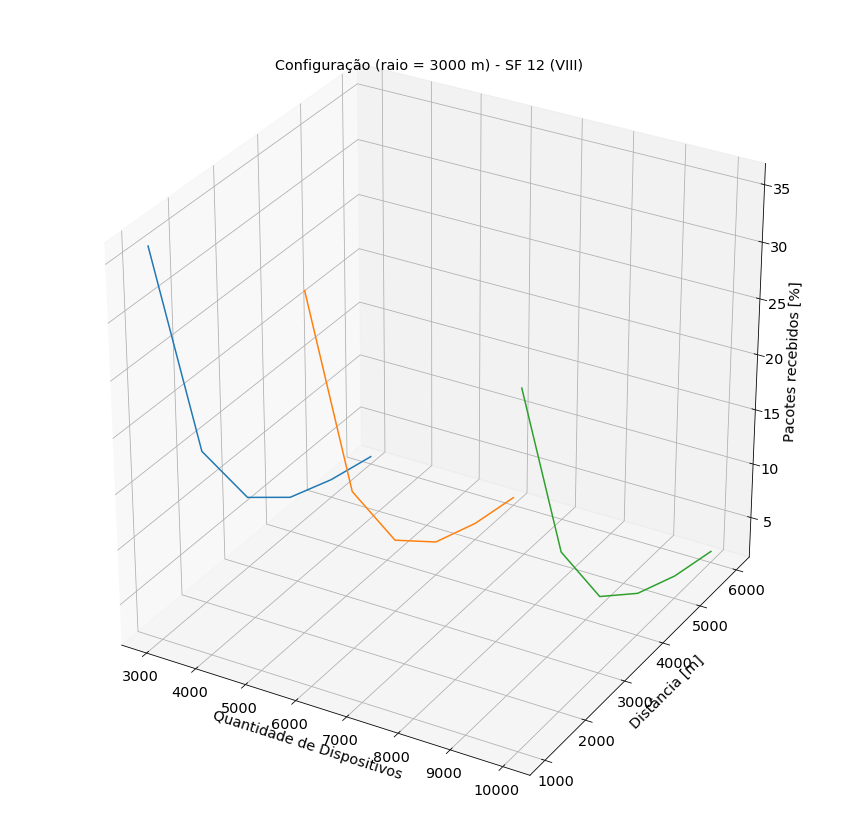

In [135]:
%run plot3DScript -f "ADR_campaign_plot3D.yaml"